# 수면 데이터 분석: 수면 품질과 수면 장애 영향 요인 연구

## 목차
1. [데이터 개요](#1-데이터-탐색적-분석)
   - 데이터셋 개요 및 변수 설명
   - 기초 통계량 확인
   - 데이터 특징 요약

2. [데이터 전처리 및 기초 시각화](#2-데이터-전처리-및-기초-시각화)
   - 설명 변수 분포 분석
     - 인구통계학적 변수 (나이, 성별, 직업)
     - 신체 관련 변수 (BMI, 혈압, 심박수)
     - 생활습관 변수 (수면시간 ,신체활동량, 일일걸음수)
     - 정신건강 변수 (스트레스 레벨)

3. [목표 변수 심층 분석](#3-목표-변수-심층-분석)
   - 수면 품질 분석
     - 분포 특성
     - 주요 영향 요인 분석
   - 수면 장애 분석
     - 유형별 특성
     - 주요 영향 요인 분석

4. 결론
   - 주요 발견사항
   - 수면 개선을 위한 제안
    
5. 한계점 및 개선방안

## 연구 목표
1. **수면 품질 영향 요인 식별**
   - 수면 품질에 영향을 미치는 주요 변수 탐색
   - 변수 간 상호작용 효과 분석

2. **수면 장애 관련 요인 분석**
   - 수면 장애 발생과 관련된 위험 요인 식별
   - 수면 장애 유형별 특성 비교

3. **수면 개선 방안 도출**
   - 분석 결과를 바탕으로 한 실질적 개선 방안 제시
   - 생활습관 개선 포인트 도출

## 분석 방법론
- 탐색적 데이터 분석 (EDA)
- 시각화 기반 분석
- 상관관계 분석

### 1. 데이터 개요

---

In [1]:
#라이브러리 불러오기
import pandas as pd
import matplotlib.pyplot as plt
import koreanize_matplotlib
import seaborn as sns
import numpy as np

In [2]:
# 데이터셋 불러오기
sleep = pd.read_csv('sleep.csv')
sleep.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


---
### 변수 설명:
1. Person ID: 각 개인을 식별하는 고유 번호
2. Gender: 성별(남성/여성)
3. Age: 나이(세)
4. Occupation: 직업 또는 전문 분야
5. Sleep Duration (hours): 일일 수면 시간(시간)
6. Quality of Sleep (scale: 1-10): 주관적인 수면의 질 평가(1-10 척도)
7. Physical Activity Level (minutes/day): 일일 신체 활동 시간(분)
8. Stress Level (scale: 1-10): 주관적인 스트레스 수준 평가(1-10 척도)
9. BMI Category: BMI 카테고리(저체중, 정상, 과체중 )
10. Blood Pressure (systolic/diastolic): 혈압 측정치(수축기 혈압/이완기 혈압)
11. Heart Rate (bpm): 안정 시 심박수(분당 박동 수)
12. Daily Steps: 일일 걸음 수
13. Sleep Disorder: 수면 장애 유무(없음, 불면증, 수면무호흡증)
---

In [3]:
#간단한 데이터셋 정보 
print(sleep.shape)
sleep.info()

(374, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [4]:
# 수치형 데이터 요약통계
sleep.describe()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


In [5]:
# 범주형 데이터 요약통계
sleep.describe(include='object')

,Gender,Occupation,BMI Category,Blood Pressure,Sleep Disorder
count,374,374,374,374,155
unique,2,11,4,25,2
top,Male,Nurse,Normal,130/85,Sleep Apnea
freq,189,73,195,99,78


---

## 데이터 특징 요약:
* 결측치: 수면장애를 제외하고 결측치가 없음. 결측치가 특정 값으로 대체되었을 가능성이 있어 보입니다.
* 변수 요약:
    1. 이 데이터셋은 총 **374명**의 수면 패턴과 관련된 변수들을 담고 있습니다.
    2. 성별은 남성이 189명으로, 여성수 185명보다 약간 더 많습니다.
    3. 대상자들의 나이 범위는 **27세에서 59세**로, 주로 일하는 연령대의 성인들로 구성되어 있습니다.
    4. 수면 시간은 **5시간 48분**에서 **8시간 30분**까지 분포합니다.
    5. 수면 품질의 실제 구간은 1-10이 아닌 **4-9**로 확인됩니다.
    6. 신체 활동 시간은 **30-90분** 사이에 분포합니다.
    7. 스트레스 레벨의 실제 구간은 1-10이 아닌 **3-8**로 확인됩니다.
    8. 안정 시 심박수는 **65-86** 사이에 분포합니다.
    9. 걸음수는 **3,000-10,000** 사이에 분포합니다.
    10. 직업 종류는 총 11개로, 374명 중 73명이 간호사로 확인되는 것으로 보아 **병원 관련 종사자들을 대상으로 수집되었을 가능성**이 있습니다.
    11. 혈압은 **130/85**라는 값이 99번 반복되는 것으로 보아, **결측치를 평균값으로 대체**했을 가능성이 높아 보입니다.
    12. BMI는 정상 범위에 해당하는 사람이 195명입니다.
    13. 수면 무호흡증을 가진 사람은 총 78명입니다.
    
---


---

## 2.전처리 및 시각화
* 각 변수의 분포 특성을 시각화하여 데이터의 특징을 파악합니다.

In [6]:
# 시각화 특징 모음 
plt.rcParams.update({'axes.titlesize': 16})
plt.rcParams.update({'font.size': 13})

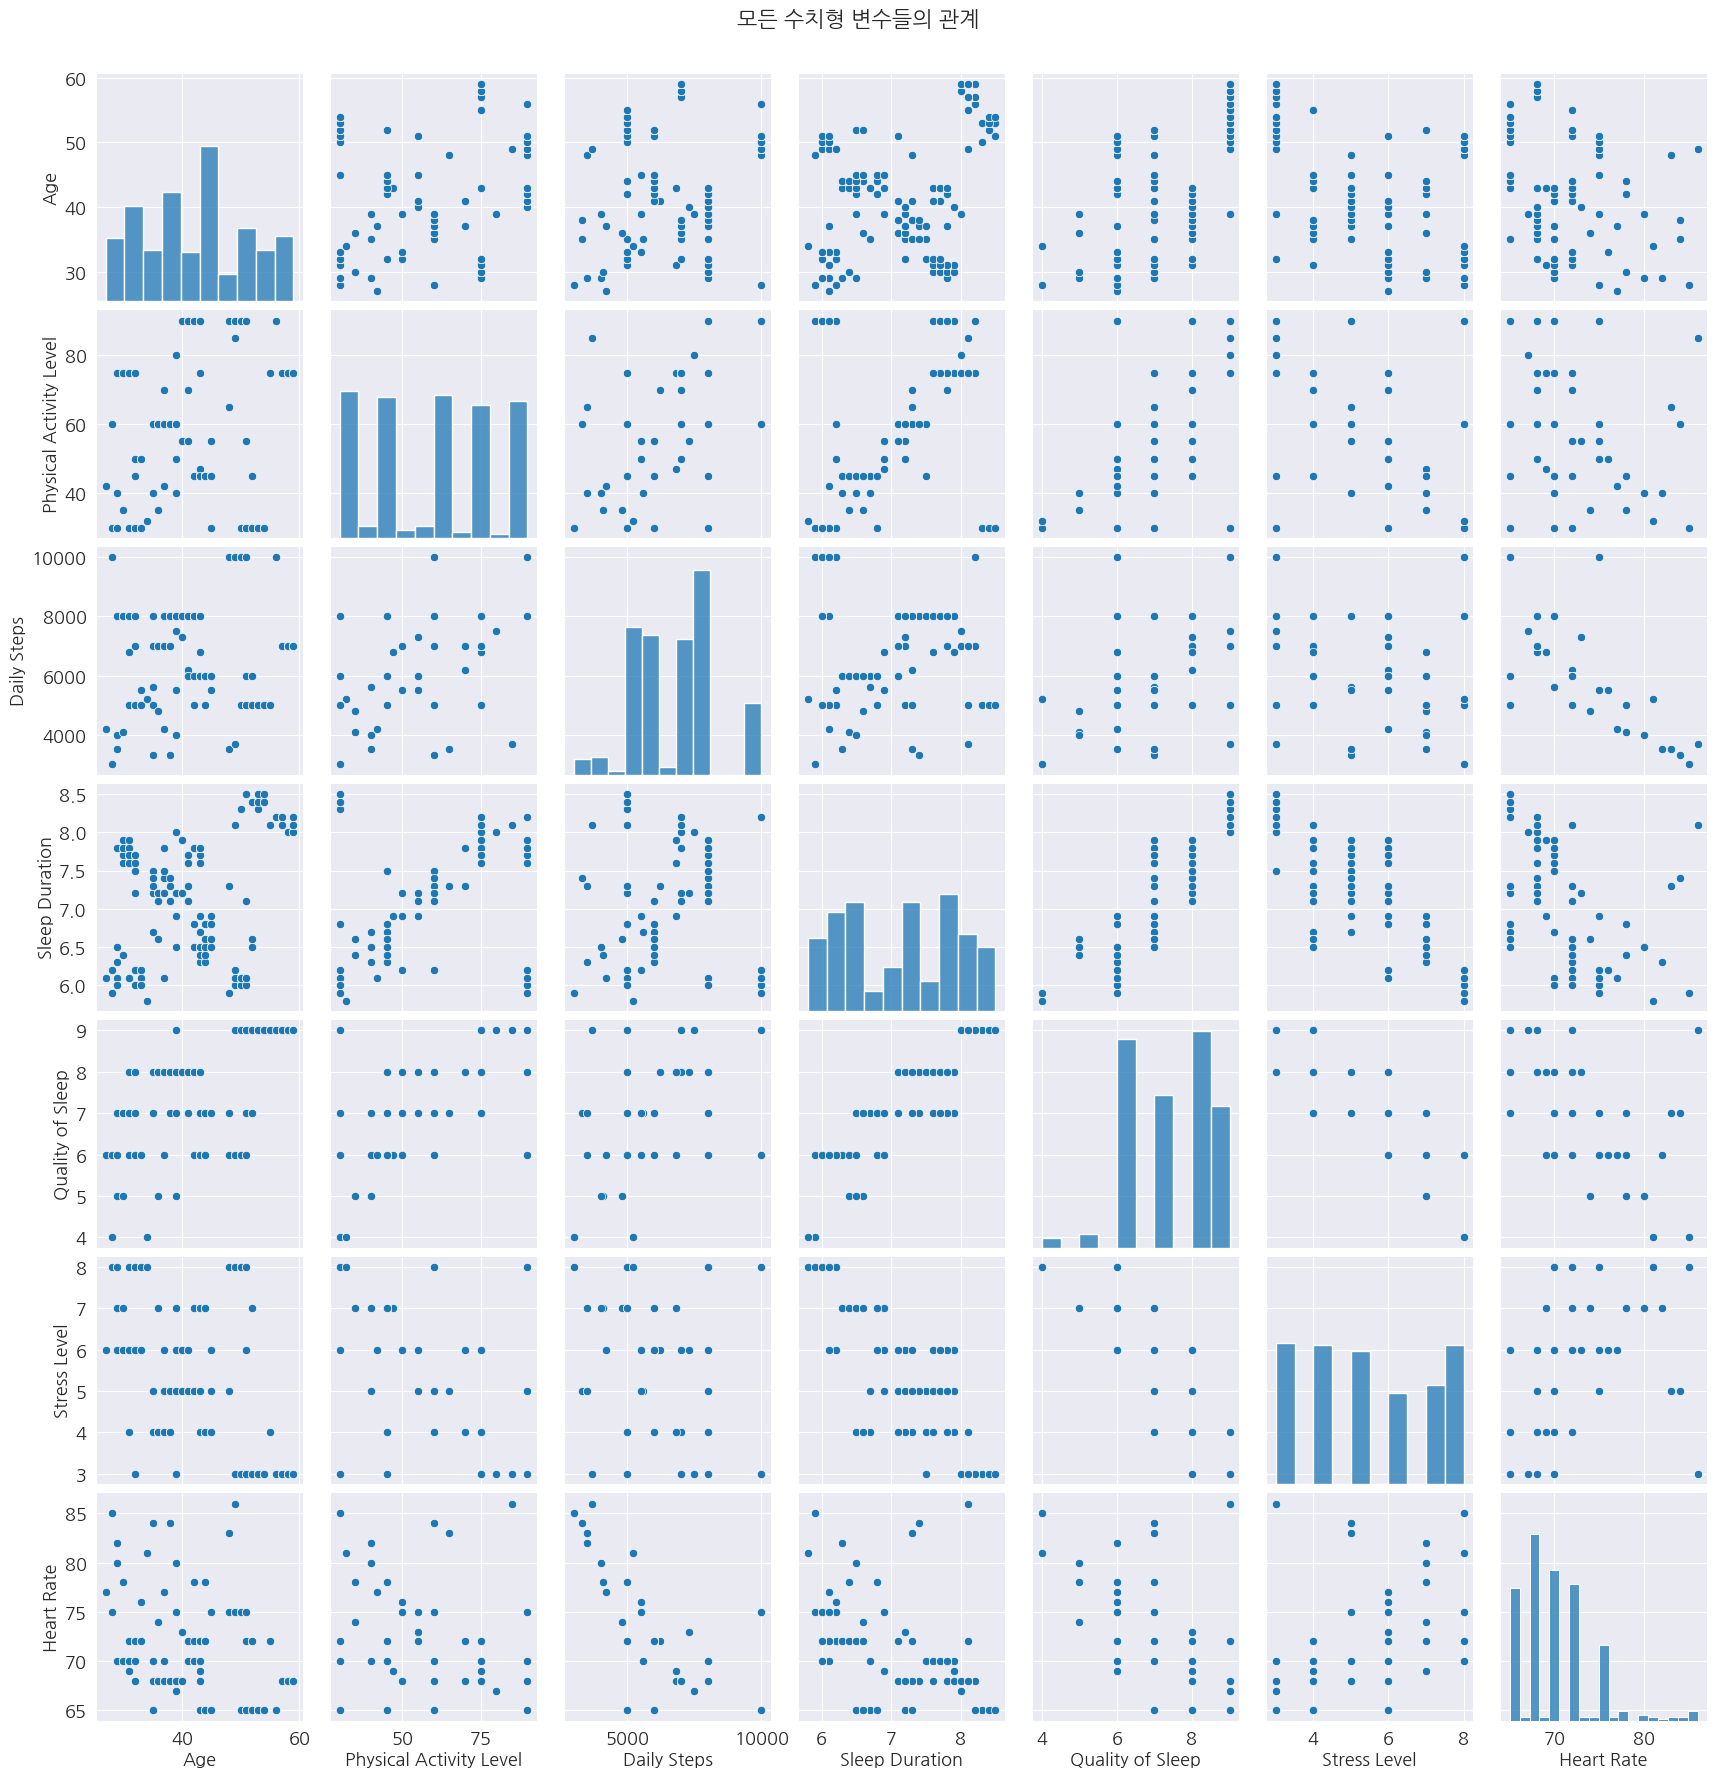

In [7]:
# 먼저 수치형 변수들의 분포를 시각화하여 데이터의 특징을 파악합니다.
sns.pairplot(sleep[['Age','Physical Activity Level','Daily Steps','Sleep Duration', 'Quality of Sleep', 
                    'Stress Level', 'Heart Rate']])
plt.suptitle('모든 수치형 변수들의 관계', y=1.02)
plt.show()

### 2-1 인구통계학적 변수

/var/folders/wt/523g88ps5cs2_z5dsn_yj80h0000gn/T/ipykernel_85230/2341228510.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels([str(abs(int(x))) for x in xticks])


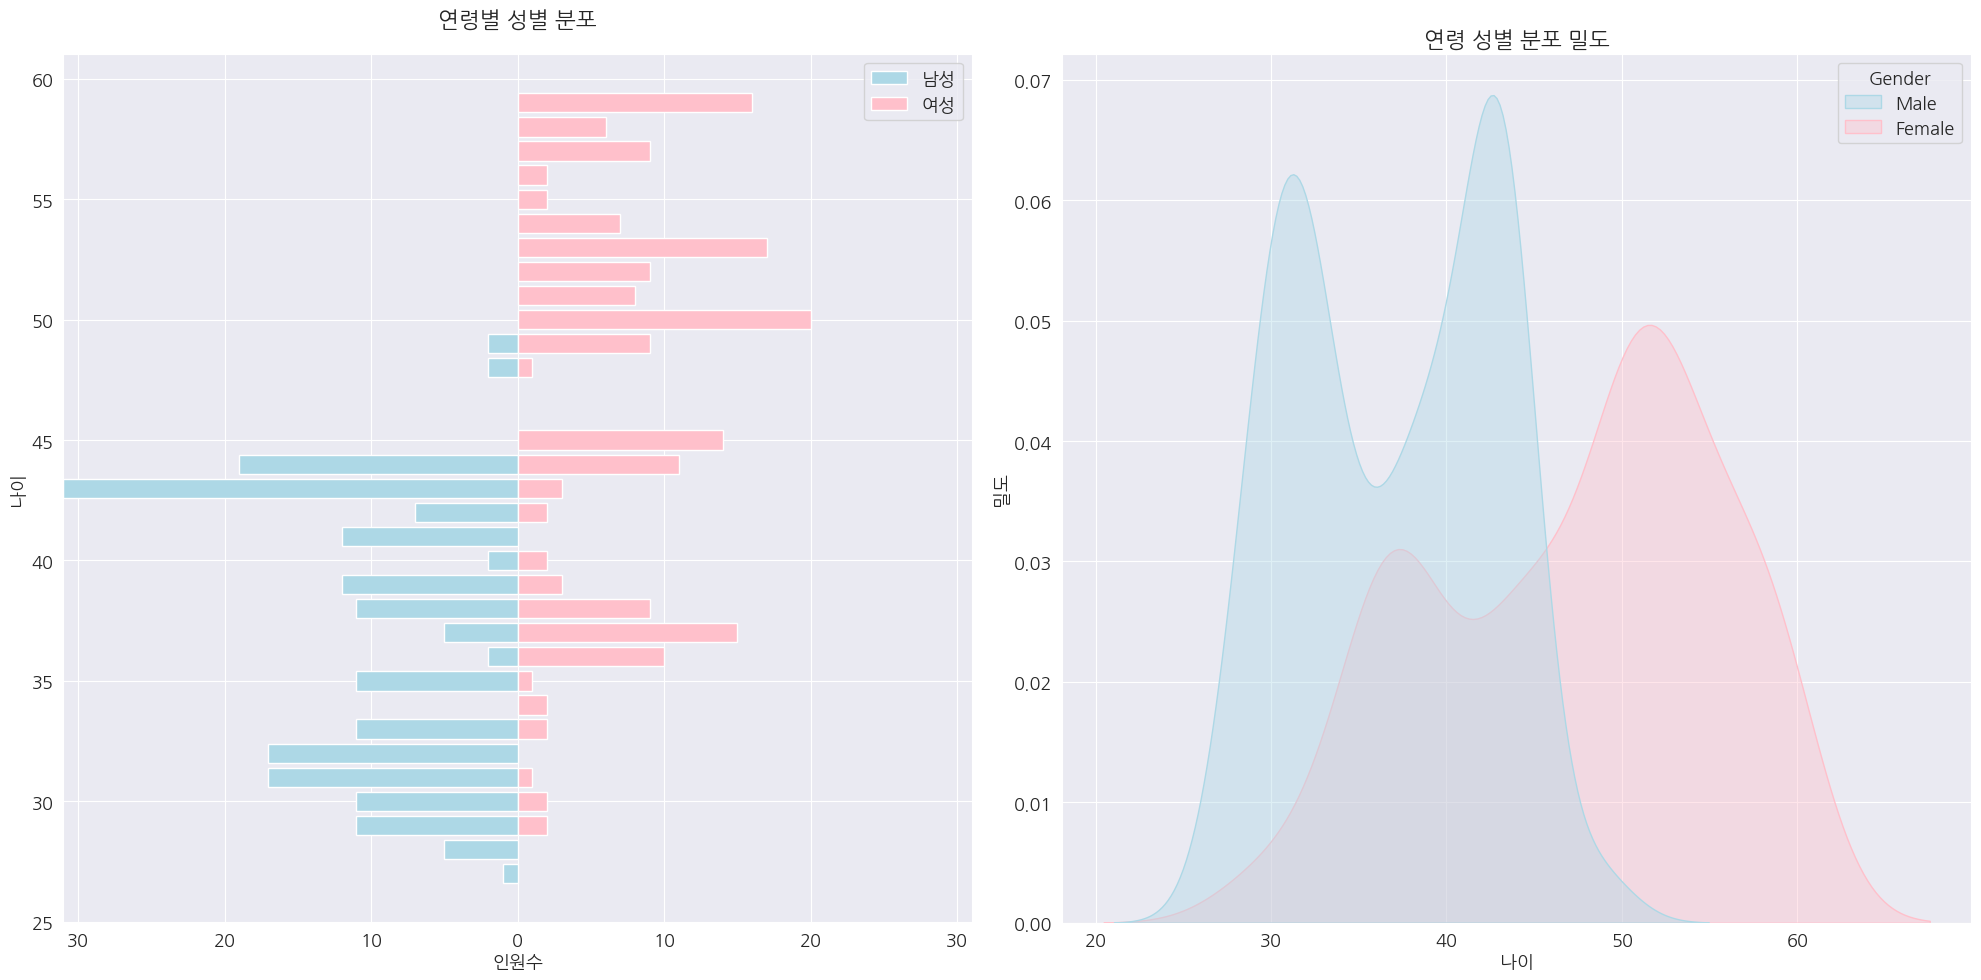

In [8]:
#1.성별과 나이 분포
plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
male_data = sleep[sleep['Gender'] == 'Male']['Age'].value_counts().sort_index()
female_data = sleep[sleep['Gender'] == 'Female']['Age'].value_counts().sort_index()
# 남성 데이터는 음수로 변환하여 왼쪽에 표시
plt.barh(male_data.index, -male_data.values, color='lightblue', label='남성')
# 여성 데이터는 오른쪽에 표시
plt.barh(female_data.index, female_data.values, color='pink', label='여성')
max_count = max(male_data.max(), female_data.max())
plt.xlim(-max_count, max_count)
# x축 레이블 절대값으로 표시
xticks = plt.gca().get_xticks()
plt.gca().set_xticklabels([str(abs(int(x))) for x in xticks])
plt.title('연령별 성별 분포', pad=20);plt.xlabel('인원수');plt.ylabel('나이');plt.legend();plt.grid(True)

# kde 그래프
plt.subplot(1, 2, 2)
sns.kdeplot(data=sleep, x='Age', hue='Gender', palette=['lightblue', 'pink'], common_norm=False, fill=True, alpha=0.4)
plt.title('연령 성별 분포 밀도');plt.xlabel('나이');plt.ylabel('밀도');plt.grid(True);plt.tight_layout();plt.show()

# #요약
# 1. 0-26 세의 인구는 0명입니다.
# 2. 27-59세의 인구로 데이터가 구성되어 있습니다.
# 3. 남성은 27-44세 까지 많이 분포하는 반면 여성은 35-59세까지 많이 분포합니다.
# ### 결론 : 남성과 여성의 나이의 분포 차이가 큼으로 데이터를 분석할때 성별에 따른 차이인지 나이에 따른 차이인지를 구분하기 어려울 수 있습니다.

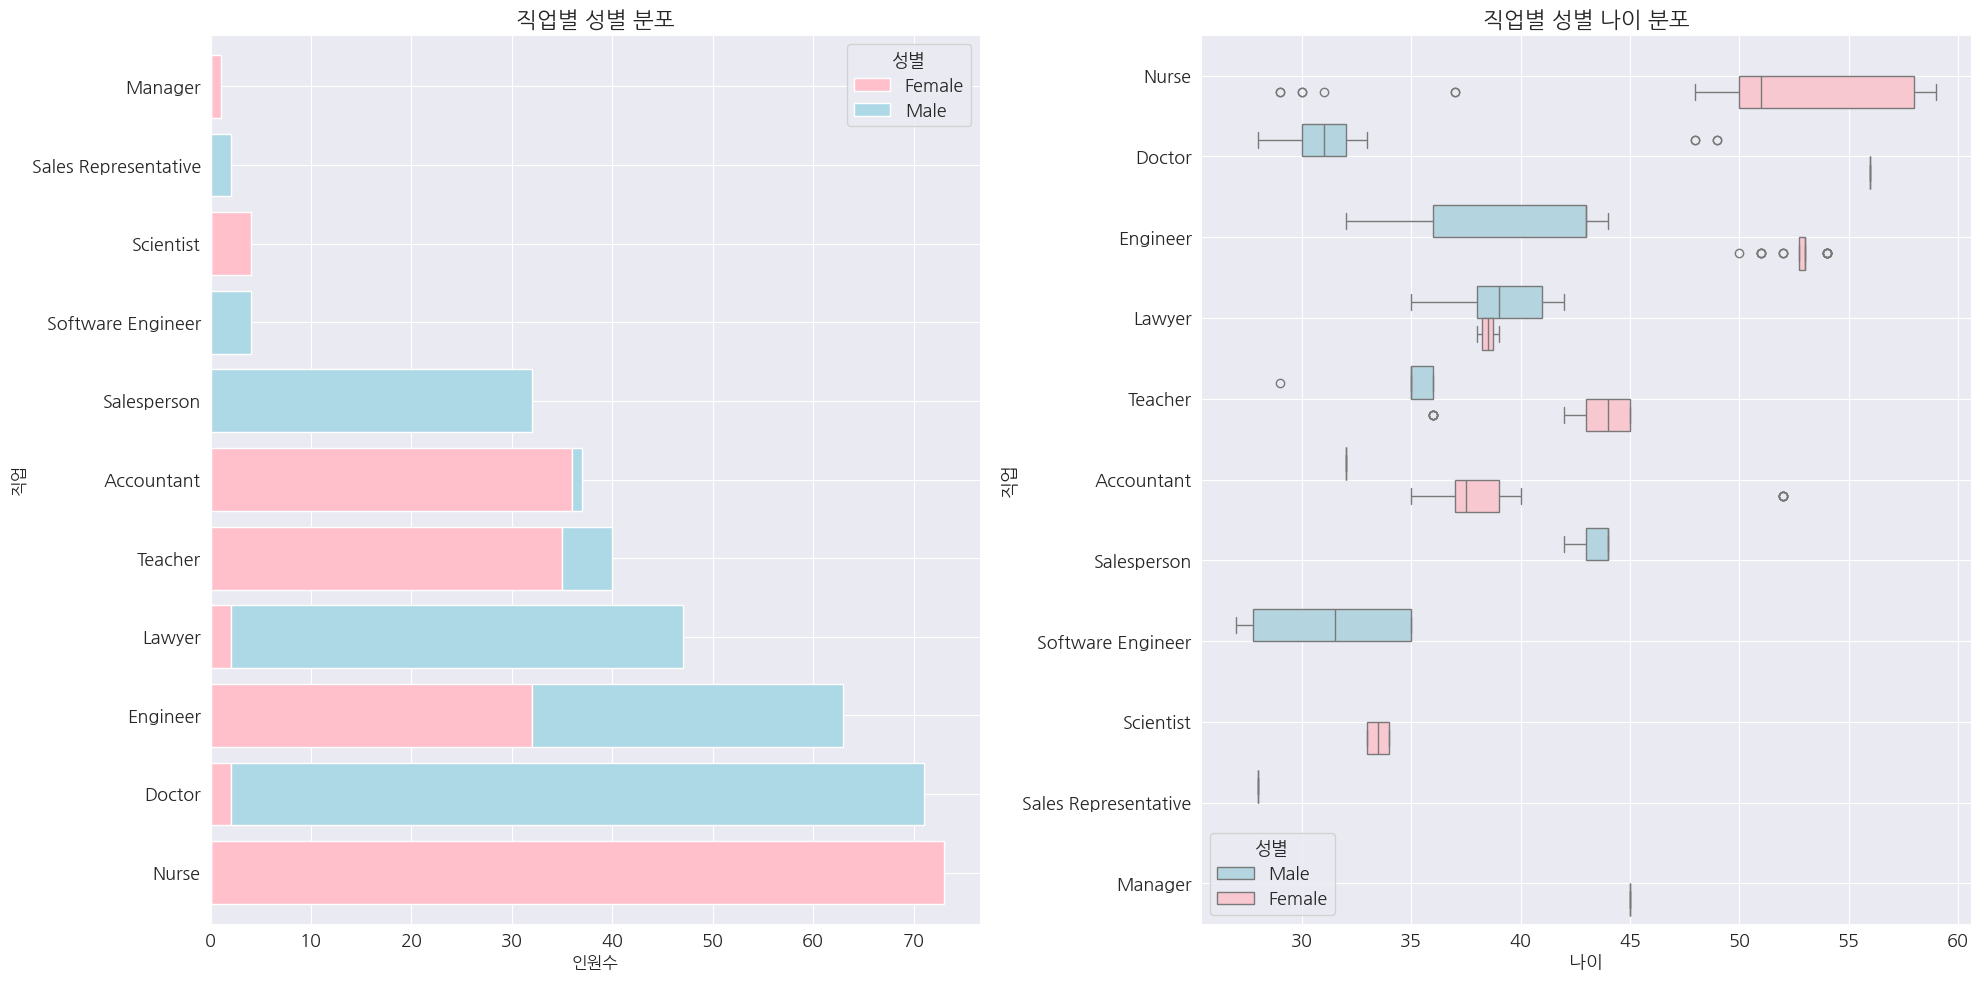

In [9]:
# 2.직업 분포
plt.figure(figsize=(20, 10))

plt.subplot(1, 2, 1)
# Stacked bar plot 생성
occupation_gender = pd.crosstab(sleep['Occupation'], sleep['Gender'])
occupation_gender = occupation_gender.reindex(sleep['Occupation'].value_counts().index)
occupation_gender.plot(kind='barh', stacked=True, color=['pink', 'lightblue'], width=0.8, ax=plt.gca())
plt.title('직업별 성별 분포', fontsize=16);plt.xlabel('인원수', fontsize=12);plt.ylabel('직업', fontsize=12);plt.legend(title='성별');plt.grid(True, axis='x')

#직업별 나이 분포 (boxplot)
plt.subplot(1, 2, 2)
sns.boxplot(y='Occupation', x='Age', hue='Gender', data=sleep,order=sleep['Occupation'].value_counts().index,palette=['lightblue','pink'])
plt.title('직업별 성별 나이 분포');plt.xlabel('나이');plt.ylabel('직업');plt.legend(title='성별');plt.grid(True)
plt.tight_layout()
plt.show()
# #요약
# 1. 무직,학생이 없는 직장인들을 대상으로 수집된 데이터입니다.
# 2. 의료 종사자(간호사+의사)가 전체 인구 374명중 144명인 것으로 보아,직업 분포가 사회의 다양한 직업군을 대표하지 않을 가능성이 높습니다.
# 3. engineer 를 제외한 모든 직업에서 남성과 여성의 성비 차이가 큽니다.
# 4. 직업별 나이 분포 그래프를 확인하면 engineer 여성의 나이 분포가 인원수에 비해 매우 좁게 분포합니다.  

### 2-2. 신체 관련 변수

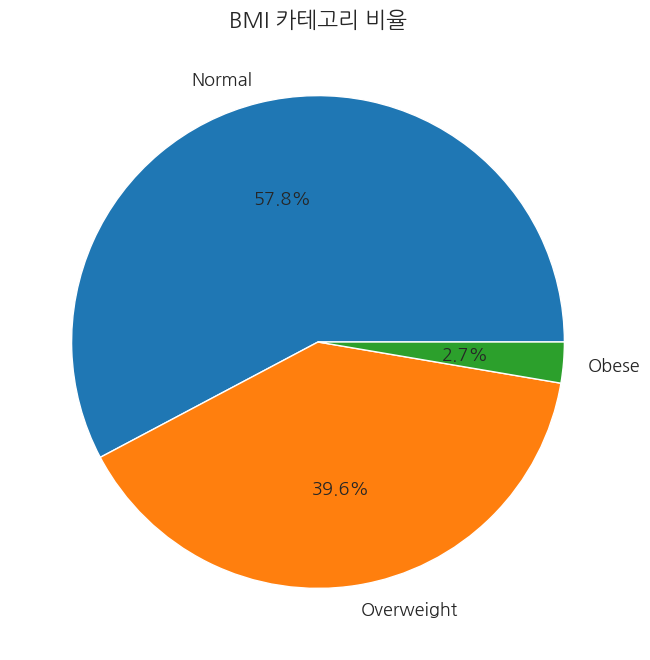

====변수명 변경후===
BMI Category
Normal        216
Overweight    148
Obese          10
Name: count, dtype: int64


In [10]:
# 3.bmi

# 'Normal Weight'를 'Normal'로 변경
sleep['BMI Category'] = sleep['BMI Category'].replace('Normal Weight', 'Normal')

# BMI 카테고리 분포 시각화
plt.figure(figsize=(10, 8))
bmi_counts = sleep['BMI Category'].value_counts()
plt.pie(bmi_counts, labels=bmi_counts.index, autopct='%1.1f%%')
plt.title('BMI 카테고리 비율')
plt.show()
print("====변수명 변경후===")
print(sleep['BMI Category'].value_counts())

#요약
# 1.동일한 의미를 가진 'Normal'과 'Normal Weight'가 중복되어 있습니다.데이터의 일관성과 위해 'Normal Weight'를 'Normal'로 변경하겠습니다.
# 2.현재 'Under Weight' 카테고리가 누락되어 있습니다.'Under Weight' 카테고리를 'Normal Weight'로 잘못 기입했을 가능성도 있습니다.

/var/folders/wt/523g88ps5cs2_z5dsn_yj80h0000gn/T/ipykernel_85230/3239375163.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=sleep, x='Blood Pressure',order = sleep['Blood Pressure'].value_counts().index,palette='coolwarm')


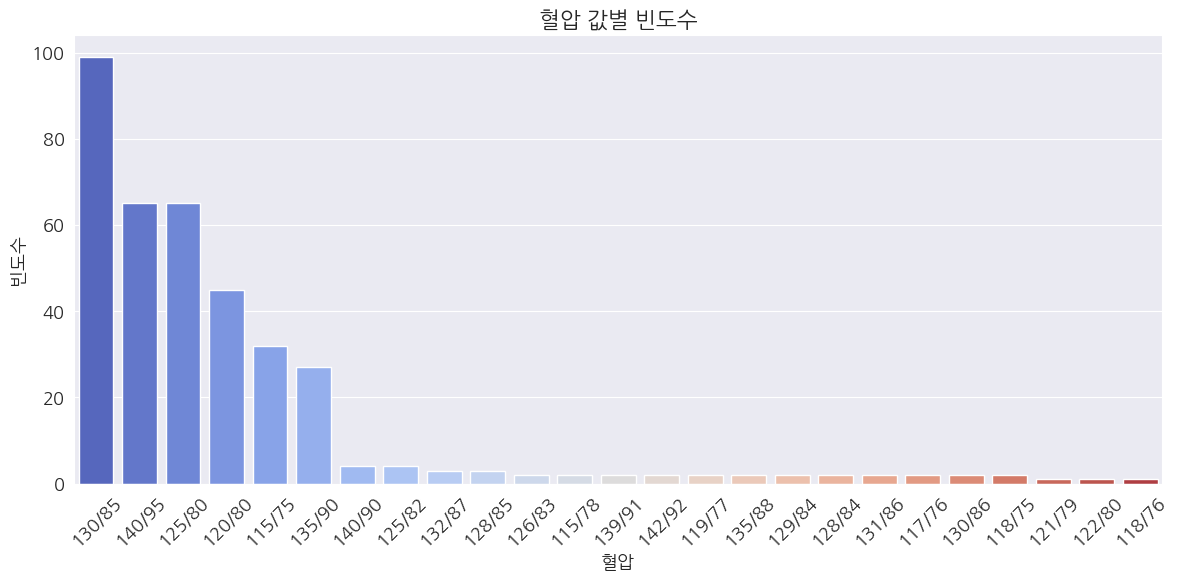

In [11]:
# 4.혈압
sleep['Blood Pressure'].value_counts()

plt.figure(figsize=(12, 6))
sns.countplot(data=sleep, x='Blood Pressure',order = sleep['Blood Pressure'].value_counts().index,palette='coolwarm')
plt.title('혈압 값별 빈도수')
plt.xlabel('혈압')
plt.ylabel('빈도수')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#요약
# 1.혈압 데이터는 비정상적으로 특정 값에 몰려 있습니다.
# 2.혈압 빈도수 top2(140/95) 와 top3(125/80)값이 정확히 일치합니다.
# 3.이러한 패턴은 실제 혈압 분포에서 나타나기 어려운 현상입니다.데이터 수집 과정에서 심각한 측정 오류나 기록 편향이 있었을 것으로 추정됩니다.
#결론 : 해당 혈압 데이터는 신뢰성이 매우 낮아 분석에 적합하지 않음으로 사용하지 않겠습니다.

/var/folders/wt/523g88ps5cs2_z5dsn_yj80h0000gn/T/ipykernel_85230/2683837727.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=sleep, x='Gender', y='Heart Rate',palette=['lightblue','pink'])


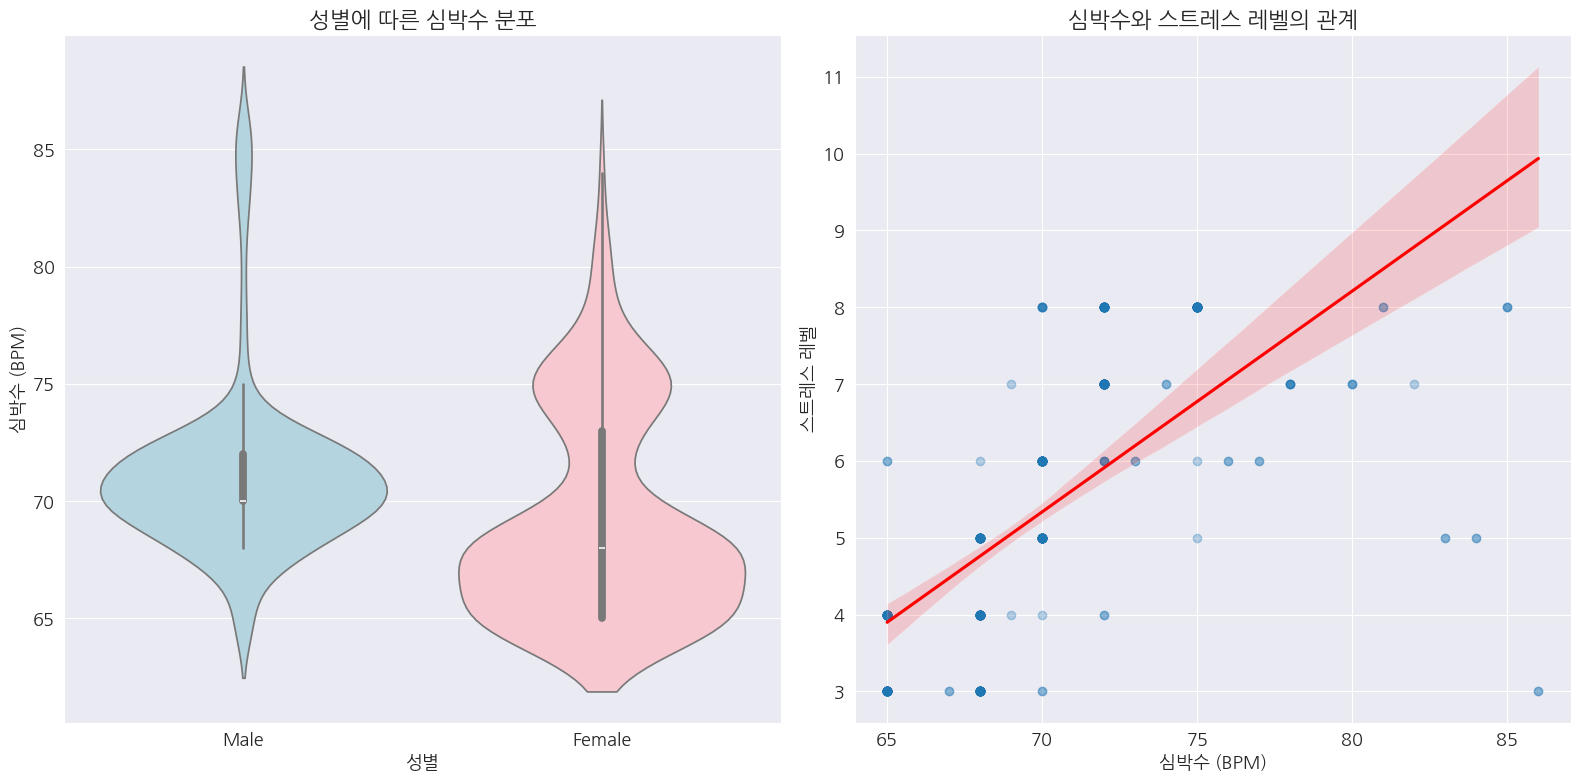

In [12]:
# 5.(안정 상태)심박수
# 심박수 데이터 시각화
plt.figure(figsize=(16, 8))

# 3. 성별에 따른 심박수 분포
plt.subplot(1, 2, 1)
sns.violinplot(data=sleep, x='Gender', y='Heart Rate',palette=['lightblue','pink'])
plt.title('성별에 따른 심박수 분포')
plt.xlabel('성별')
plt.ylabel('심박수 (BPM)')

# 심박수와 스트레스 의 관계
plt.subplot(1, 2, 2)
sns.regplot(data=sleep, x='Heart Rate', y='Stress Level', scatter_kws={'alpha':0.3}, line_kws={'color': 'red'})
plt.title('심박수와 스트레스 레벨의 관계')
plt.xlabel('심박수 (BPM)')
plt.ylabel('스트레스 레벨')
plt.tight_layout()
plt.show()

# 요약 
# 1.심박수 70-72 부근에서 여성의 수가 적은 것은 단순히 남녀의 생물학적 차이라기보다는 남성과 여성의 나이의 분포 차이가 크기 때문 일 수 있습니다.
# 2.심박수가 높을수록 스트레스 레벨이 높아지는 경향이 있습니다.

### 2-3 생활습관 변수

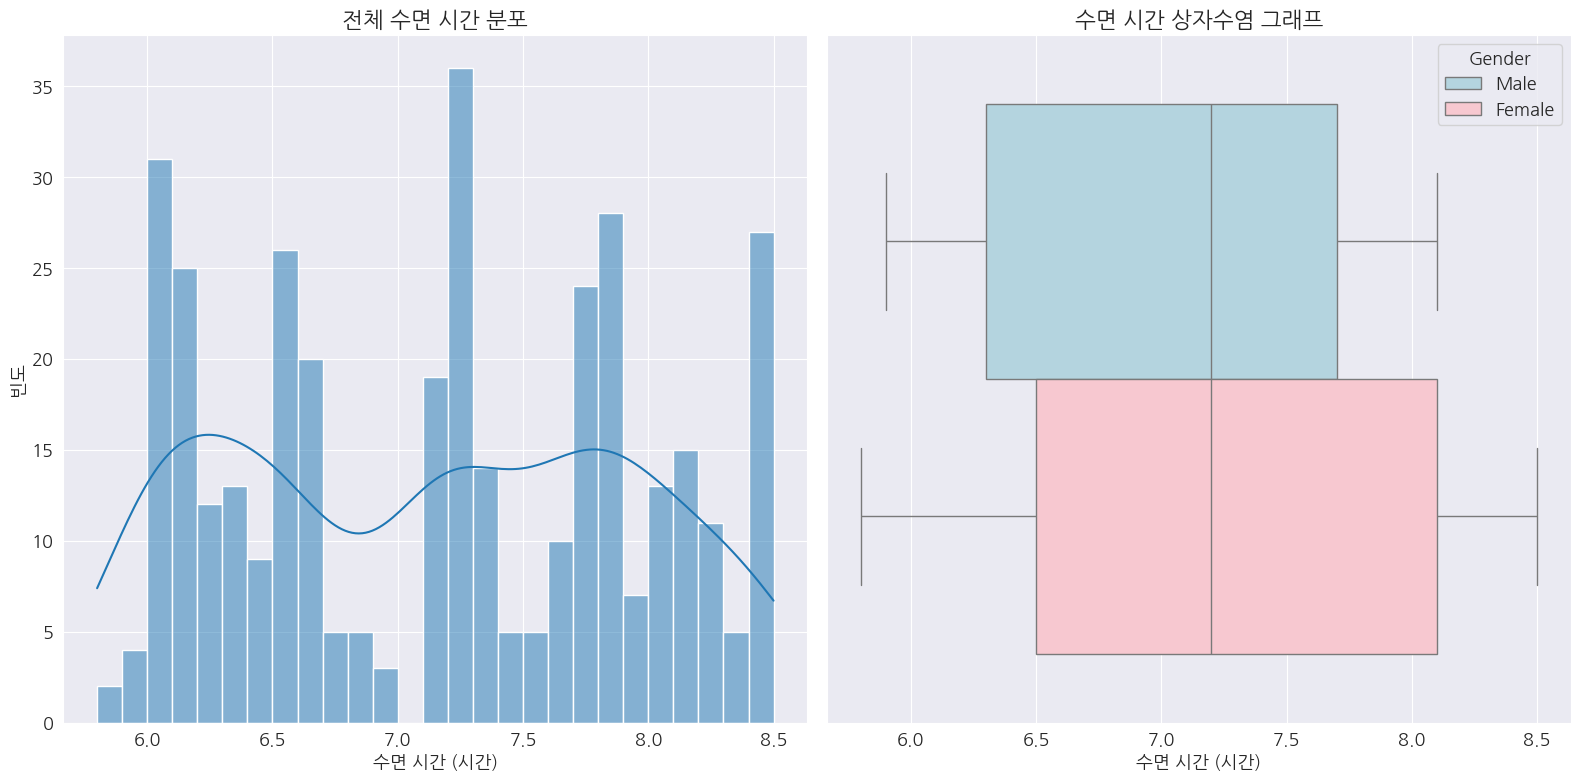

In [13]:
# 6.수면 시간
plt.figure(figsize=(16, 8))

# 히스토그램 + KDE
plt.subplot(1, 2, 1)
sns.histplot(data=sleep, x='Sleep Duration', bins=27, kde=True)
plt.title('전체 수면 시간 분포');plt.xlabel('수면 시간 (시간)');plt.ylabel('빈도')

# 박스플롯
plt.subplot(1, 2, 2)
sns.boxplot(data=sleep,hue='Gender', x='Sleep Duration',palette=['lightblue','pink'])
plt.title('수면 시간 상자수염 그래프');plt.xlabel('수면 시간 (시간)');plt.tight_layout()

plt.show()
# #요약
# 1. 수면 시간은 5시간 48분에서 8시간 30분까지 분포하고 있습니다.
# 2. 남성은 여성보다 수면시간이 더 적은 경향이 있습니다.

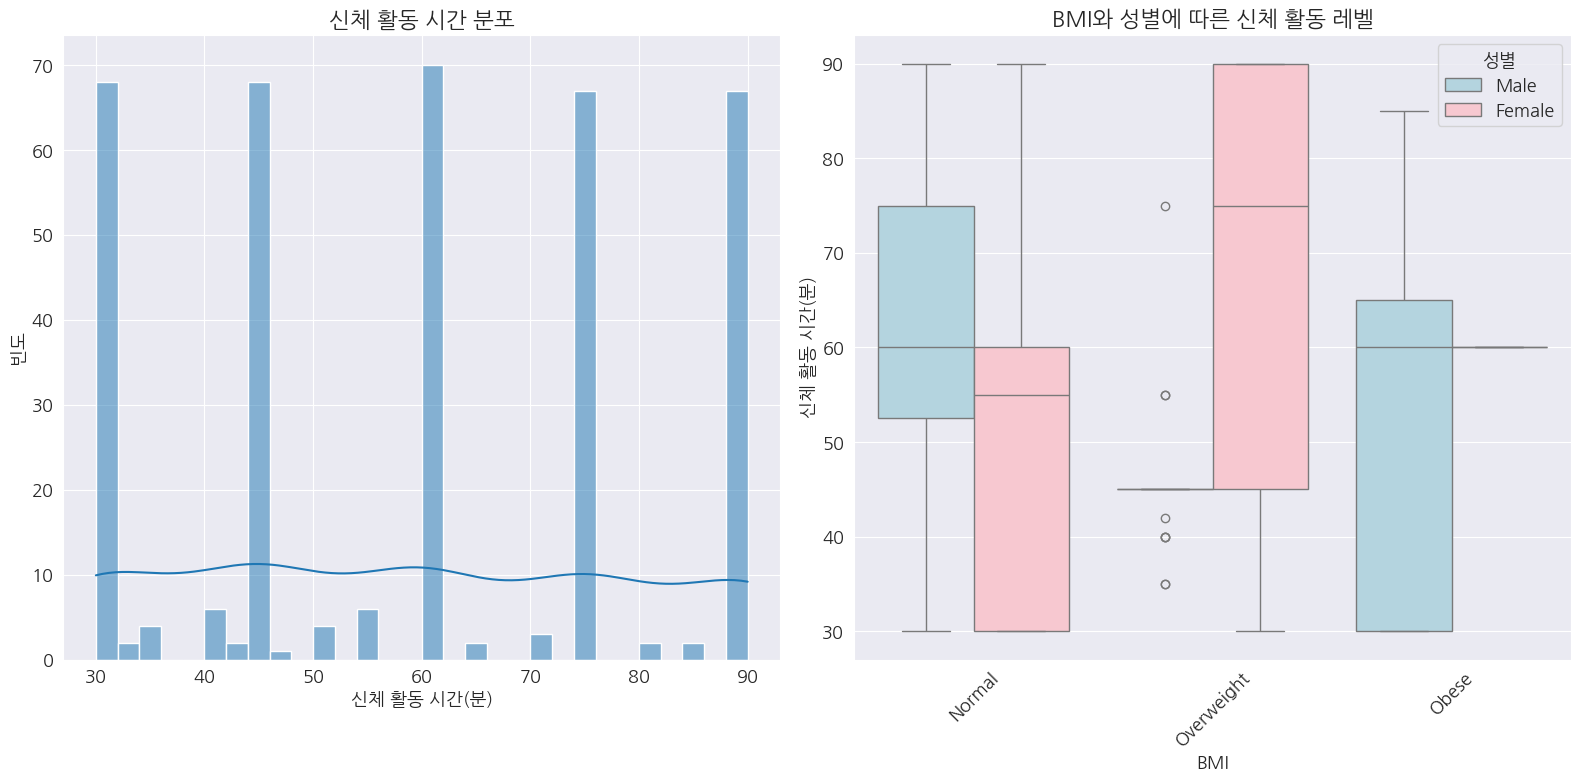

In [14]:
#5.신체 활동 분포

# 신체활동 히스토그램 + KDE
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
sns.histplot(data=sleep, x='Physical Activity Level', bins=30, kde=True)
plt.title('신체 활동 시간 분포');plt.xlabel('신체 활동 시간(분)');plt.ylabel('빈도');plt.grid(True)

# BMI 와 성별에 따른 신체 활동량
plt.subplot(1, 2, 2)
sns.boxplot(data=sleep, x='BMI Category', y='Physical Activity Level', hue='Gender',order=['Normal','Overweight','Obese'] ,palette=['lightblue', 'pink'])
plt.title('BMI와 성별에 따른 신체 활동 레벨');plt.xlabel('BMI');plt.ylabel('신체 활동 시간(분)');plt.xticks(rotation=45);plt.legend(title='성별');plt.tight_layout()
plt.show()

#요약: 
# 1. 30분부터 90분까지 15분 단위로 균등하게 분포하고 있습니다.
# 2. 모든 인원이 신체활동을 하고 있습니다.
# 3. 남성은 bmi 지수가 높을수록 신체활동량이 감소하는 경향이 있지만 여성은 반대로 bmi 지수가 높을수록 신체활동량이 증가하는 경향이 있습니다.

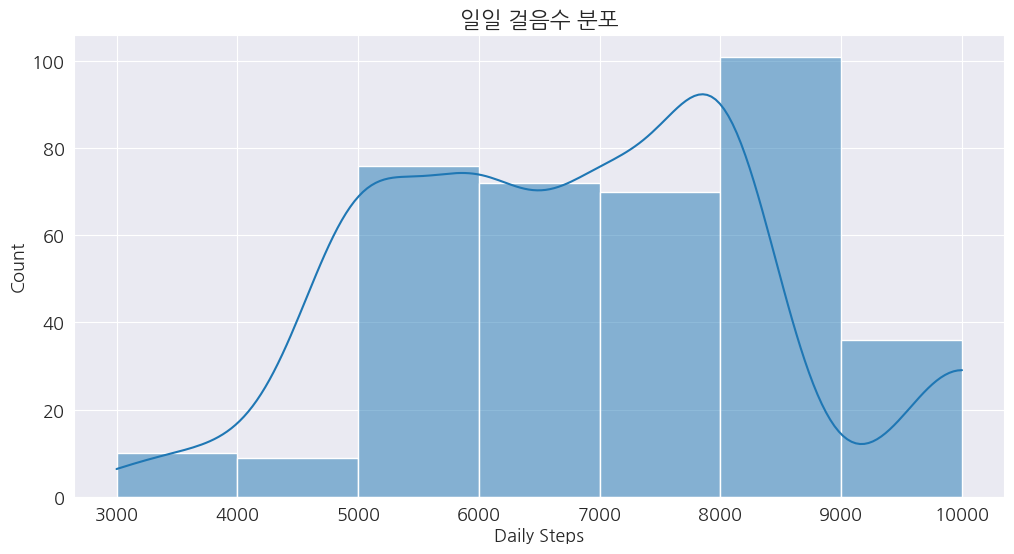

In [15]:
# 일일 걸음수

# 히스토그램 + KDE
plt.figure(figsize=(12, 6))
bins = np.arange(3000, 10001, 1000)
sns.histplot(data=sleep, x='Daily Steps', bins=bins, kde=True)
plt.title('일일 걸음수 분포');plt.show()

### 2-4. 정신건강 변수

/var/folders/wt/523g88ps5cs2_z5dsn_yj80h0000gn/T/ipykernel_85230/1085066678.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=sleep, x='Stress Level',palette='coolwarm')


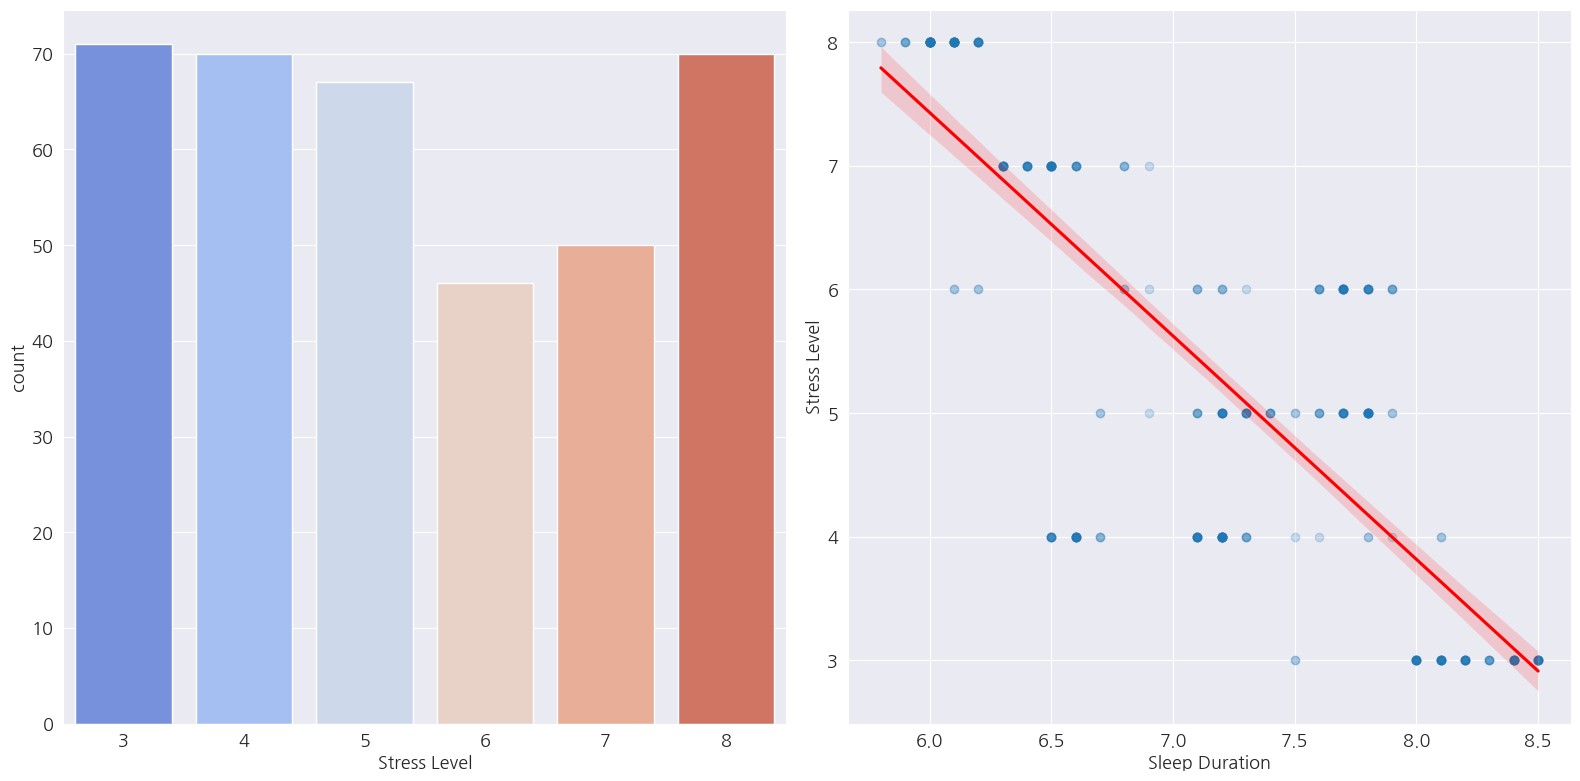

In [16]:
# 7.스트레스 레벨
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
sns.countplot(data=sleep, x='Stress Level',palette='coolwarm')
plt.subplot(1,2,2)
sns.regplot(data=sleep, x='Sleep Duration', y='Stress Level', scatter_kws={'alpha':0.2}, line_kws={'color': 'red'})
plt.tight_layout();plt.show();

#요약 
#1. 스트레스 레벨은 3-8까지 분포하고 있습니다.
#2. 스트레스 레벨 6,7 에서 다소 적지만 전반적으로 균등하게 분포하고 있습니다.
#3. 수면시간이 증가할수록 스트레스 레벨이 감소하는 경향이 있습니다.

---

## 3.목표 변수 심층 분석
1. 목표 변수의 분포 특성 분석
2. 수면 품질 분석
3. 수면 장애 분석

/var/folders/wt/523g88ps5cs2_z5dsn_yj80h0000gn/T/ipykernel_85230/2279805266.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=sleep, x='Quality of Sleep',palette='coolwarm')


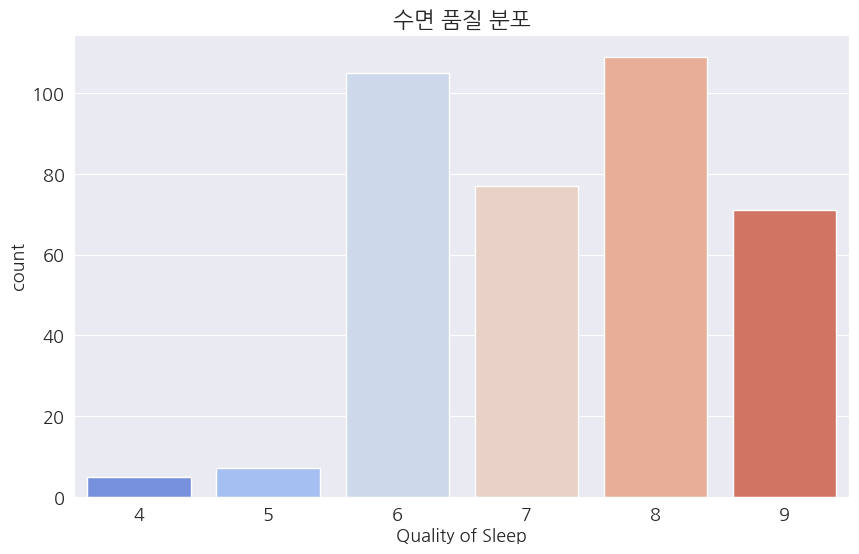

In [17]:
# 8. 수면 품질

# 수면 품질 분포 시각화
plt.figure(figsize=(10,6))
sns.countplot(data=sleep, x='Quality of Sleep',palette='coolwarm')
plt.title('수면 품질 분포')
plt.show()

In [18]:
# 9.수면 장애
sleep['Sleep Disorder'].isna().sum() #결측치 합계 확인

219

0
Sleep Disorder
None           219
Sleep Apnea     78
Insomnia        77
Name: count, dtype: int64


/var/folders/wt/523g88ps5cs2_z5dsn_yj80h0000gn/T/ipykernel_85230/3555023162.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=sleep, x='Sleep Disorder',palette='coolwarm')


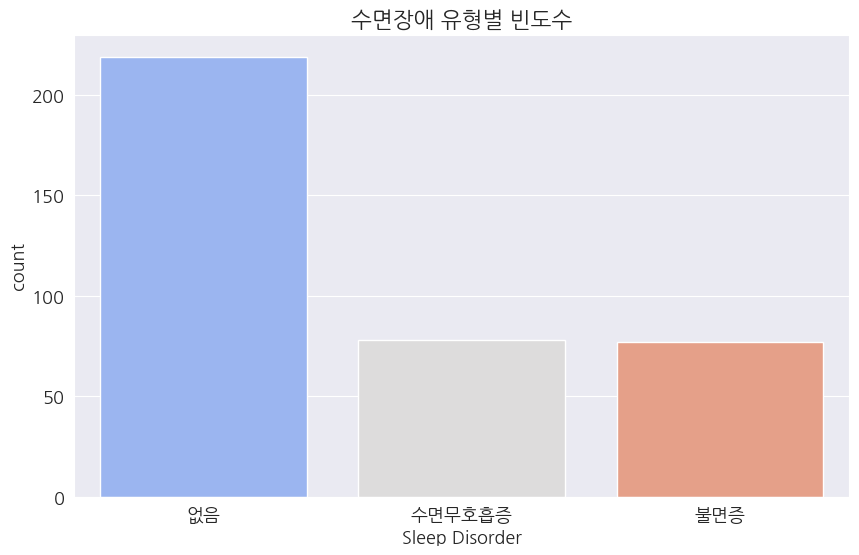

In [19]:
# 수면장애 전처리

sleep['Sleep Disorder'] = sleep['Sleep Disorder'].fillna('None')
print(sleep['Sleep Disorder'].isna().sum()) 
print(sleep['Sleep Disorder'].value_counts())

# 수면장애 유형별 빈도수 시각화
plt.figure(figsize=(10,6))
sns.countplot(data=sleep, x='Sleep Disorder',palette='coolwarm')
plt.xticks(range(3), ['없음', '수면무호흡증', '불면증'])
plt.title('수면장애 유형별 빈도수')
plt.show()

---

### 3-1. 수면 품질 분석

1. 수치형 변수 상관관계 분석후 수면 품질과 상관관계 높은 변수 선별
2. 시각화
    * **2-1.** 나이와 성별에 따른 수면 품질 만족도 분포
    * **2-2.** 직업별 수면 만족도
    * **2-3.** 수면장애 유형별 수면 만족도
    * **2-4.** 수면 시간과 수면 품질의 관계
    * **2-5.** 스트레스 레벨과 수면 품질의 관계
    * **2-6.** 심장 박동수와 수면 품질의 관계

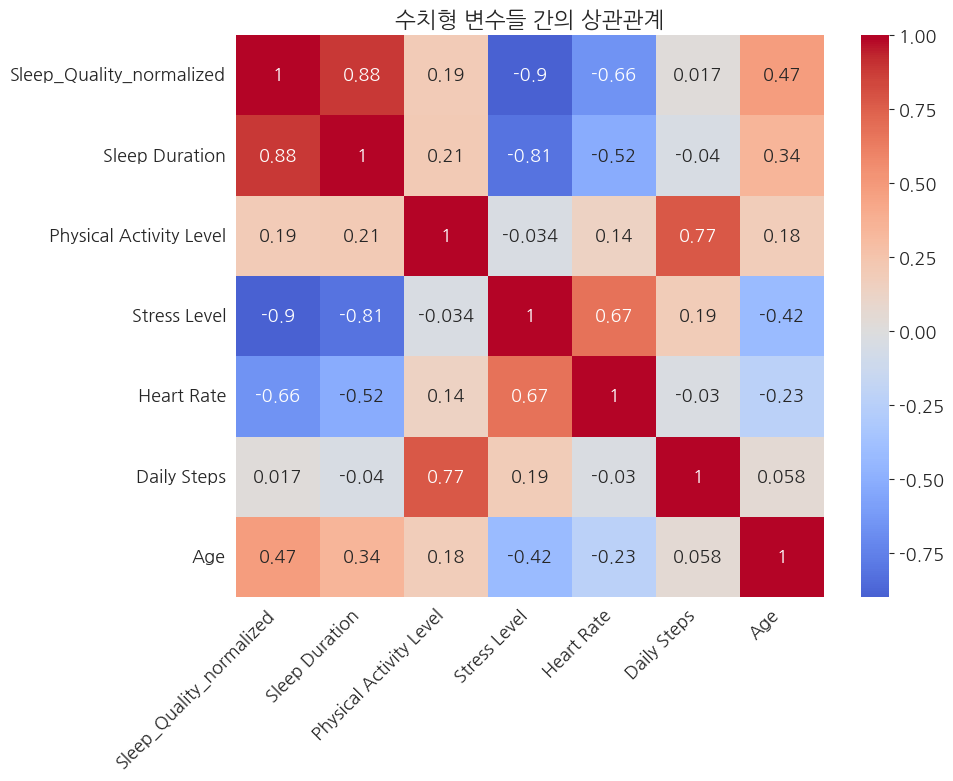

In [20]:
# 1. 수치형 변수 상관관계 분석후 수면 품질과 상관관계 높은 변수(절댓값 0.3 이상) 선별
# Min-Max 정규화 (4-9 범위)
sleep['Sleep_Quality_normalized'] = (sleep['Quality of Sleep'] - 4) / (9 - 4)

# 정규화된 데이터로 상관관계 분석
numerical_cols = ['Sleep_Quality_normalized','Sleep Duration', 'Physical Activity Level','Stress Level', 'Heart Rate', 'Daily Steps', 'Age']
correlation_normalized = sleep[numerical_cols].corr()

#히트맵으로 상관관계 시각화
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_normalized, annot=True, cmap='coolwarm', center=0)
plt.title('수치형 변수들 간의 상관관계');plt.xticks(rotation=45, ha='right');plt.yticks(rotation=0);plt.tight_layout();plt.show()

# 밑에 나온 상관계수를 토대로 수면 품질과 관련된 변수들을 선별하여 시각화 분석을 진행하겠습니다.
# 선별된 데이터 목록 ['Sleep Duration','Stress Level','Heart Rate','Age'] 
# 상관관계 분석 안한 범주형 데이터 목록 ['Gender', 'Occupation', 'BMI Category', 'Sleep Disorder']

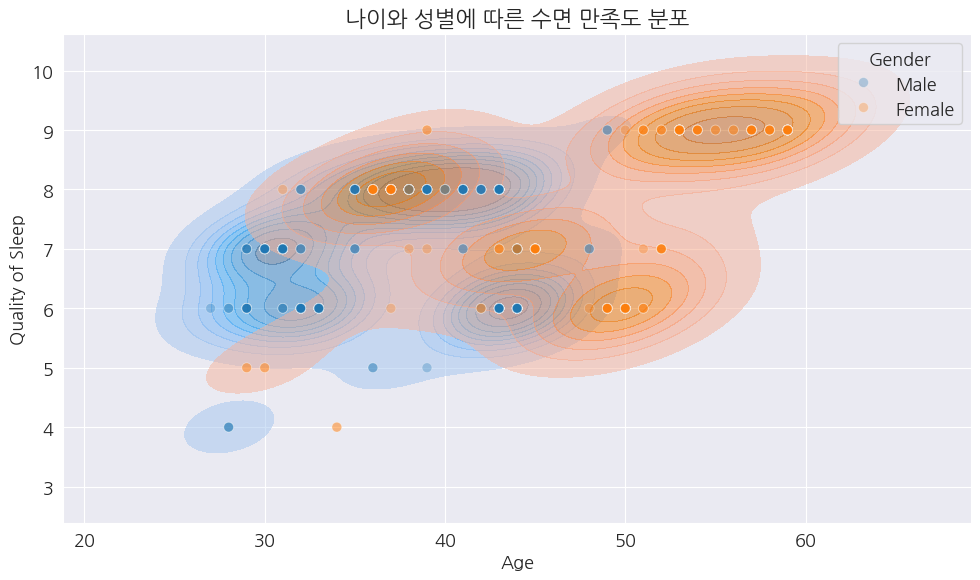

In [21]:
#2-1.나이와 성별에 따른 수면 만족도 분포
plt.figure(figsize=(10,6))
sns.kdeplot(data=sleep,x='Age',y='Quality of Sleep',hue='Gender',fill=True,alpha=0.5)
sns.scatterplot(data=sleep,x='Age',y='Quality of Sleep',hue='Gender',alpha=0.3,s=50)
plt.title('나이와 성별에 따른 수면 만족도 분포');plt.tight_layout();plt.show()
# 남성의 경우 나이와 무관하게 수면 만족도가 일정한 반면, 여성은 나이가 많아질수록 수면의 질이 향상되는 것으로 해석됩니다. 
# 그러나 비슷한 연령대의 남성과 여성을 비교했을 때는 두 성별 간 큰 차이가 관찰되지 않습니다. 
# 이를 종합하면, 남성과 여성 간 수면 만족도 차이는 단순히 성별 때문이라기보다, 나이 요인에 의해 발생한 것으로 추정할 수 있습니다.

/var/folders/wt/523g88ps5cs2_z5dsn_yj80h0000gn/T/ipykernel_85230/251234893.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Occupation', y='Quality of Sleep', data=sleep,palette='coolwarm')#박스 플롯


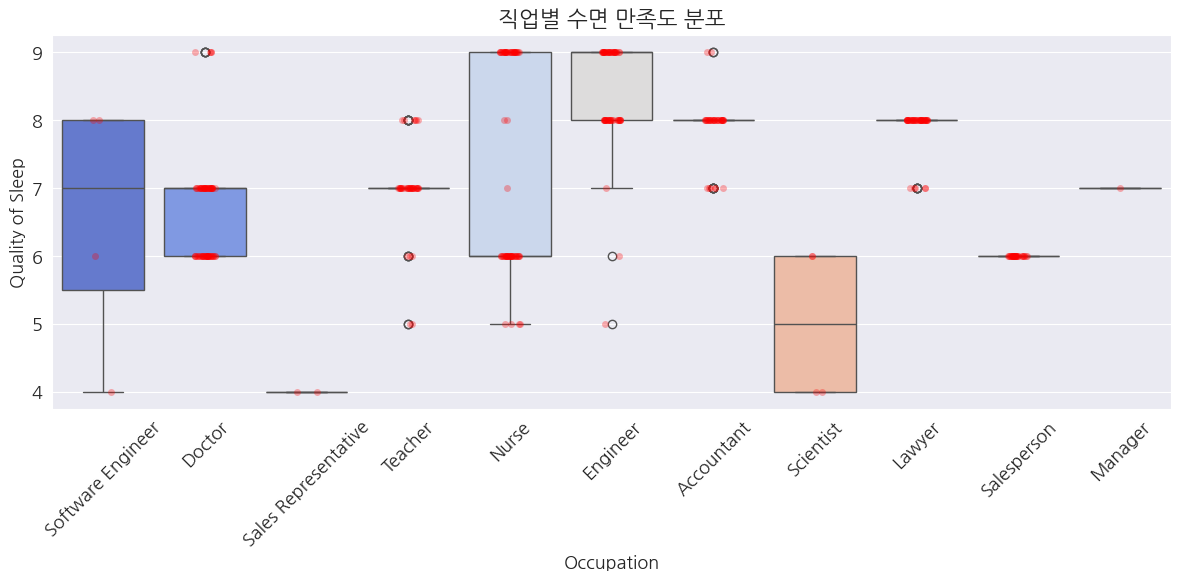

Occupation
Nurse                   73
Doctor                  71
Engineer                63
Lawyer                  47
Teacher                 40
Accountant              37
Salesperson             32
Software Engineer        4
Scientist                4
Sales Representative     2
Manager                  1
Name: count, dtype: int64

In [22]:
#2-2.직업별 수면 만족도 
plt.figure(figsize=(12, 6))
sns.boxplot(x='Occupation', y='Quality of Sleep', data=sleep,palette='coolwarm')#박스 플롯
sns.stripplot(x='Occupation', y='Quality of Sleep', data=sleep, color='red', alpha=0.3)#stripplot 추가함으로서 실제 분포 확인
plt.xticks(rotation=45);plt.title('직업별 수면 만족도 분포');plt.tight_layout();plt.show()
sleep['Occupation'].value_counts()
#요약
# 1. 엔지니어가 가장 높은 수면 만족도를 보이고 있습니다.
# 2. 데이터가 적긴 하나 과학자의 수면 만족도가 가장 낮은 것으로 나타났습니다.

/var/folders/wt/523g88ps5cs2_z5dsn_yj80h0000gn/T/ipykernel_85230/4233415407.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=sleep,x="Sleep Disorder",y="Quality of Sleep",palette='coolwarm')


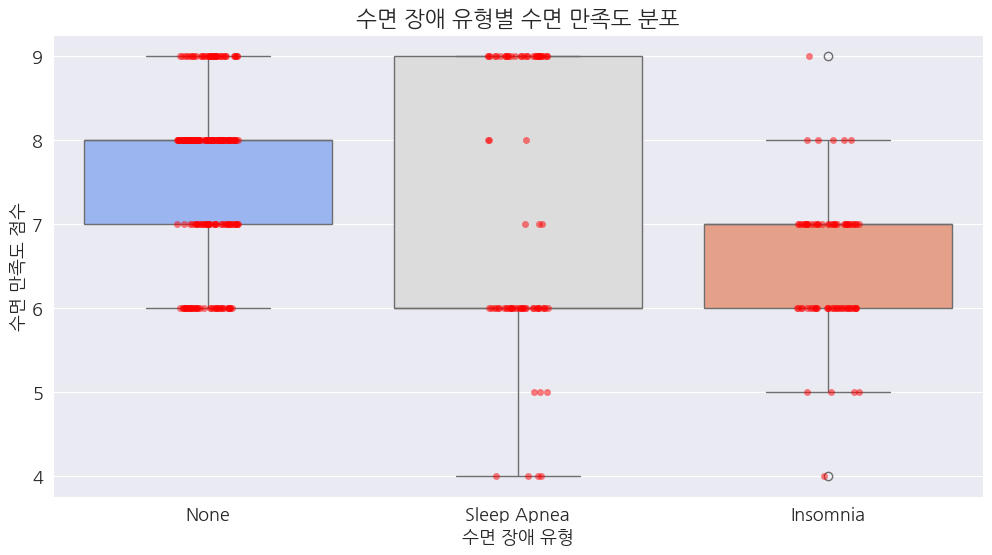

In [23]:
#2-3.수면장애 유형별 수면 만족도
plt.figure(figsize=(12, 6))
sns.boxplot(data=sleep,x="Sleep Disorder",y="Quality of Sleep",palette='coolwarm')
sns.stripplot(x='Sleep Disorder', y='Quality of Sleep', data=sleep, color='red', alpha=0.5) # stripplot 추가함으로서 실제 분포 확인
plt.title('수면 장애 유형별 수면 만족도 분포');plt.ylabel('수면 만족도 점수');plt.xlabel('수면 장애 유형');plt.show()

#요약
# 1. 전반적으로 어떠한 수면 장애도 갖고 있지 않는 그룹이 가장 높은 수면 만족도를 보이고 있습니다.
# 2. 불면증을 가진 사람들이 가장 낮은 수면 만족도를 보이고 있습니다.
# 3. 특이하게도 수면 무호흡증을 가진 사람을은 수면 만족도가 9 와 6 에 몰려있습니다.

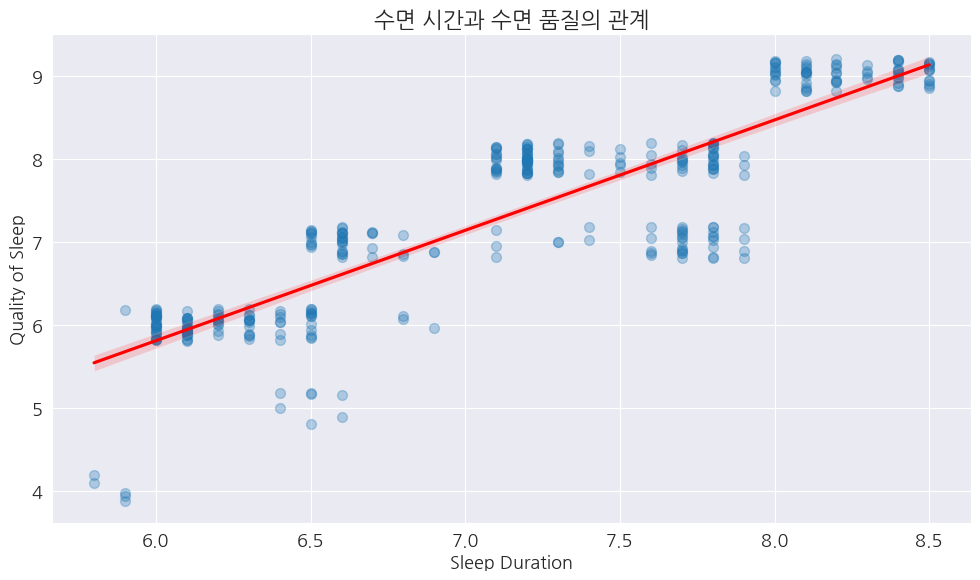

In [24]:
#2-4.수면 시간과 수면 품질의 관계
plt.figure(figsize=(10, 6))
sns.regplot(data=sleep,x='Sleep Duration',y='Quality of Sleep',scatter_kws={'alpha':0.3, 's':50},line_kws={'color': 'red'},y_jitter=0.2)
# y_jitter 추가하여 겹치는 데이터 확인
plt.title('수면 시간과 수면 만족도의 관계')
plt.tight_layout()
plt.show()

#요약
# 수면 시간이 증가할수록 수면 만족도가 높은 패턴이 나타납니다.

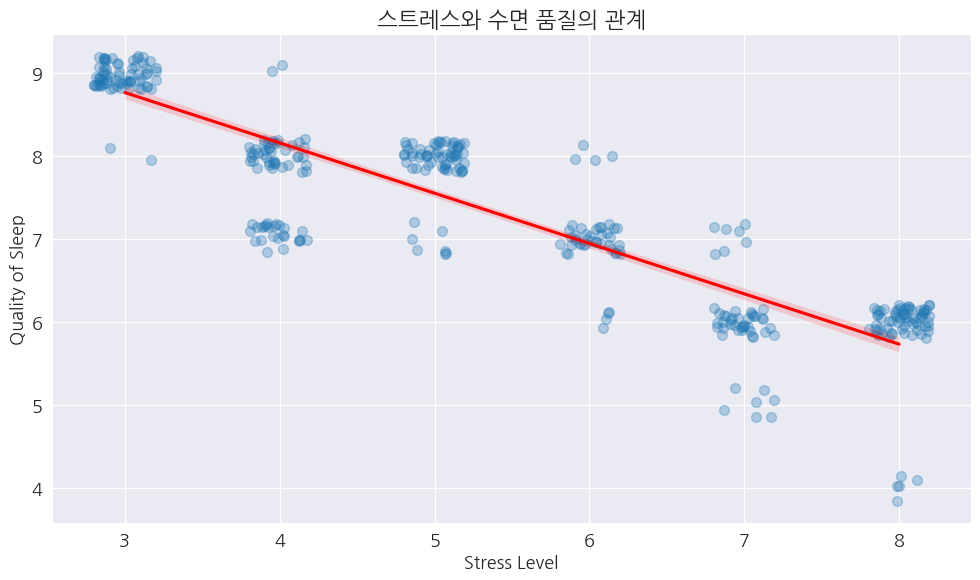

In [25]:
#2-5.스트레스 레벨과 수면 품질의 관계
plt.figure(figsize=(10, 6))
sns.regplot(data=sleep,x='Stress Level',y='Quality of Sleep',scatter_kws={'alpha':0.3, 's':50},line_kws={'color': 'red'},x_jitter=0.2,y_jitter=0.2)
plt.title('스트레스와 수면 품질의 관계')
plt.tight_layout()
plt.show()

#요약
#스트레스 수준이 높을수록 수면 품질이 낮은 패턴이 나타납니다.

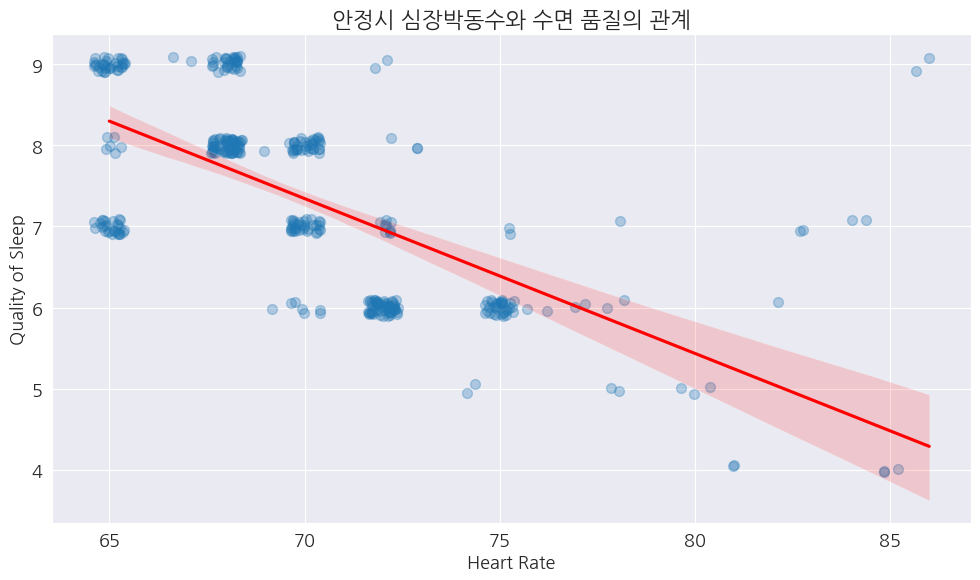

In [26]:
#2-6. 심장 박동수와 수면 품질의 관계
plt.figure(figsize=(10, 6))
sns.regplot(data=sleep,x='Heart Rate',y='Quality of Sleep',scatter_kws={'alpha':0.3, 's':50},line_kws={'color': 'red'},x_jitter=0.4,y_jitter=0.1)
plt.title('안정시 심장박동수와 수면 품질의 관계')
plt.tight_layout()
plt.show()

#요약
#심박수가 낮을수록 수면 품질이 높은 패턴이 나타납니다.

---

### 3-2. 수면 장애 분석
1. 시각화
    * **1-1.** 나이와 수면장애에 따른 수면 만족도 분포
    * **1-2.** 성별과 수면 장애에 따른 수면 만족도
    * **1-3.** BMI와 수면 장애에 따른 수면 만족도
    * **1-4.** 직업과 수면 장애
    * **1-5.** 신체활동량과 수면 장애
    * **1-6.** 심박수와 수면 장애
    * **1-7.** 수면 시간과 수면 장애

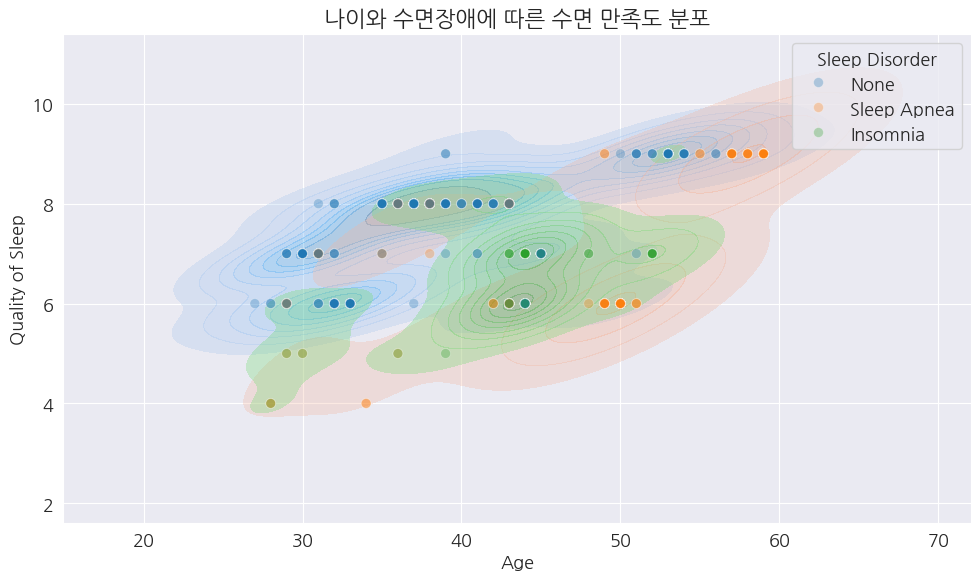

In [27]:
#1-1. 나이와 수면장애에 따른 수면 만족도 분포
plt.figure(figsize=(10,6))
sns.kdeplot(data=sleep,x='Age',y='Quality of Sleep',hue='Sleep Disorder',fill=True,alpha=0.3)
sns.scatterplot(data=sleep,x='Age',y='Quality of Sleep',hue='Sleep Disorder',alpha=0.3,s=50)
plt.title('나이와 수면장애에 따른 수면 만족도 분포')
plt.tight_layout()
plt.show()

#요약
#1.같은 나이를 기준으로 수면 장애가 없는 그룹이 수면 만족도가 높은 경향이 있습니다.
#2.그래프를 보면 같은 나이를 기준으로 수면 무호흡증을 가진 그룹이 수면 만족도가 가장 낮은 경향이 있습니다.
#3.나이가 많아질수록 수면 무호흡증을 가진 사람들의 분포가 많습니다.

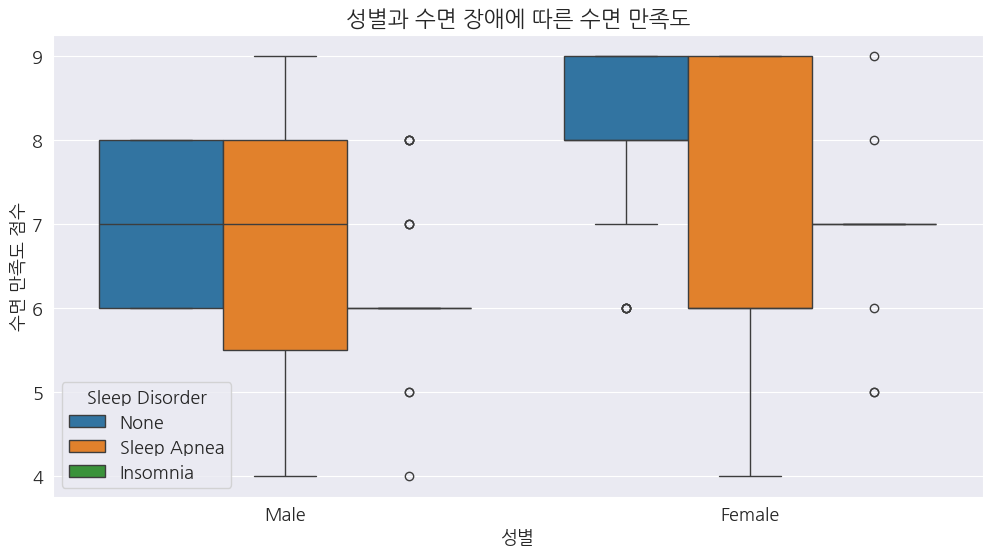

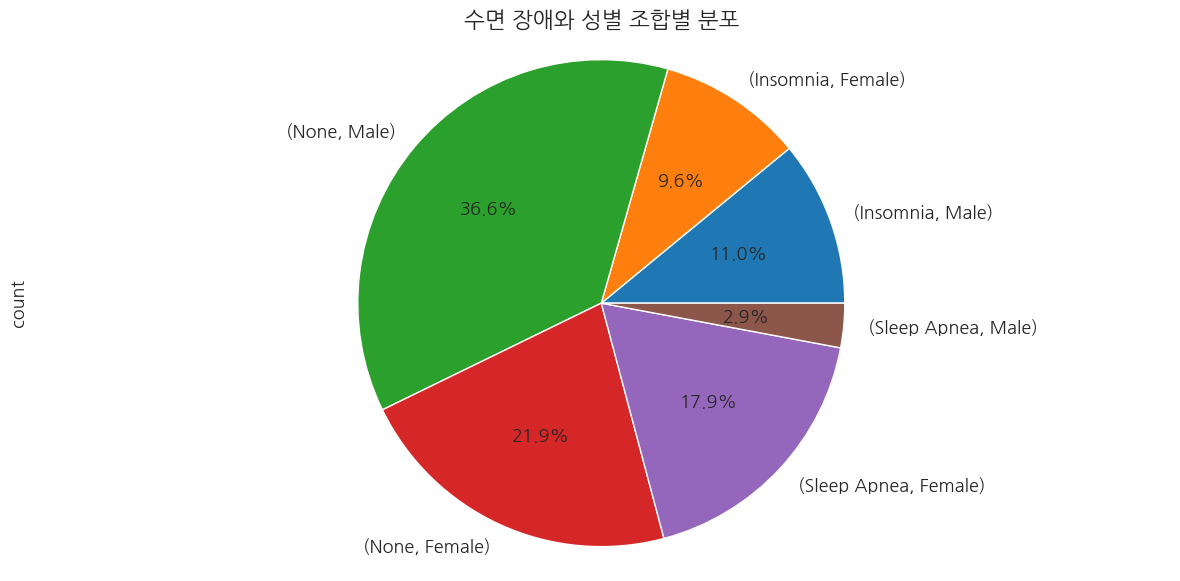

In [28]:
#1-2 성별과 수면 장애에 따른 수면 만족도
plt.figure(figsize=(12, 6))
sns.boxplot(data=sleep,x="Gender",y="Quality of Sleep",hue="Sleep Disorder")
plt.title('성별과 수면 장애에 따른 수면 만족도');plt.ylabel('수면 만족도 점수');plt.xlabel('성별');plt.show()

plt.figure(figsize=(12, 6))
sleep.groupby('Sleep Disorder')['Gender'].value_counts().plot.pie(autopct ='%1.1f%%')
plt.title('수면 장애와 성별 조합별 분포');plt.axis('equal');plt.tight_layout();plt.show()
#요약
# 1. 여성은 남성보다 수면 만족도가 높은 경향이 있습니다.
# 2. 불면증을 가진 사람의 수면 만족도 분포 가 매우 좁게 분포하고 있습니다.

<Figure size 1200x600 with 0 Axes>

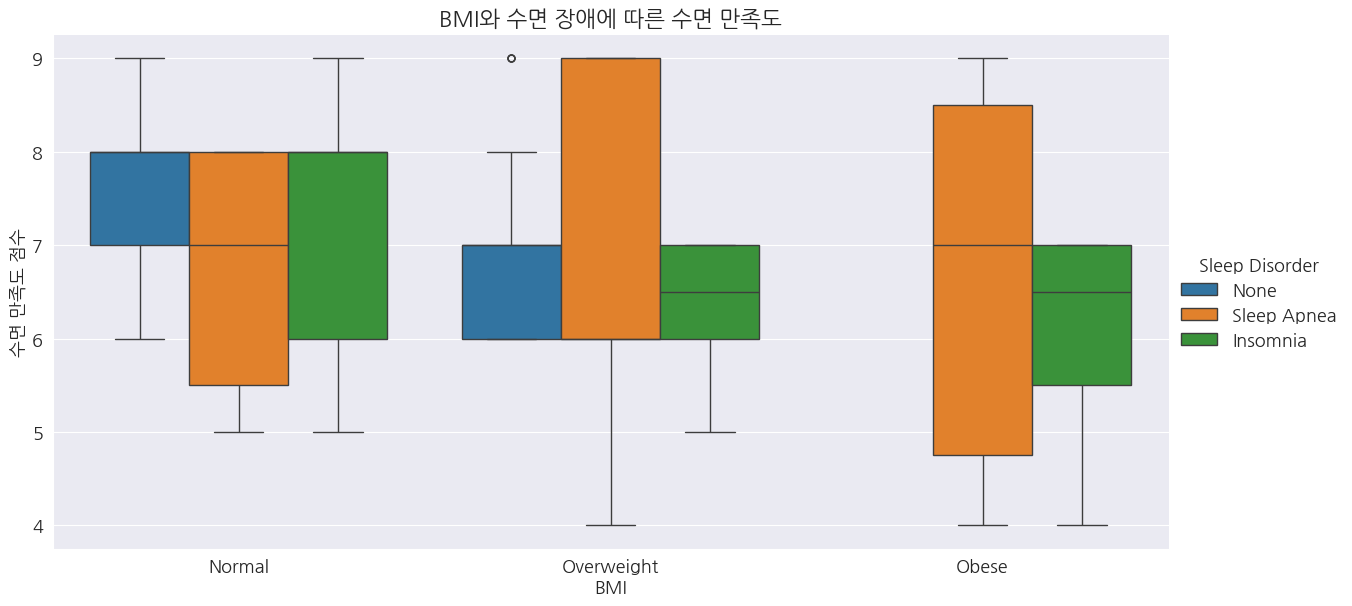

In [29]:
#1-3. BMI와 수면 장애에 따른 수면 만족도
plt.figure(figsize=(12, 6))
sns.catplot(data=sleep,x="BMI Category",y="Quality of Sleep",hue="Sleep Disorder",kind='box',height=6,aspect=2,order=['Normal', 'Overweight', 'Obese'])
plt.title('BMI와 수면 장애에 따른 수면 만족도');plt.ylabel('수면 만족도 점수');plt.xlabel('BMI');plt.show()



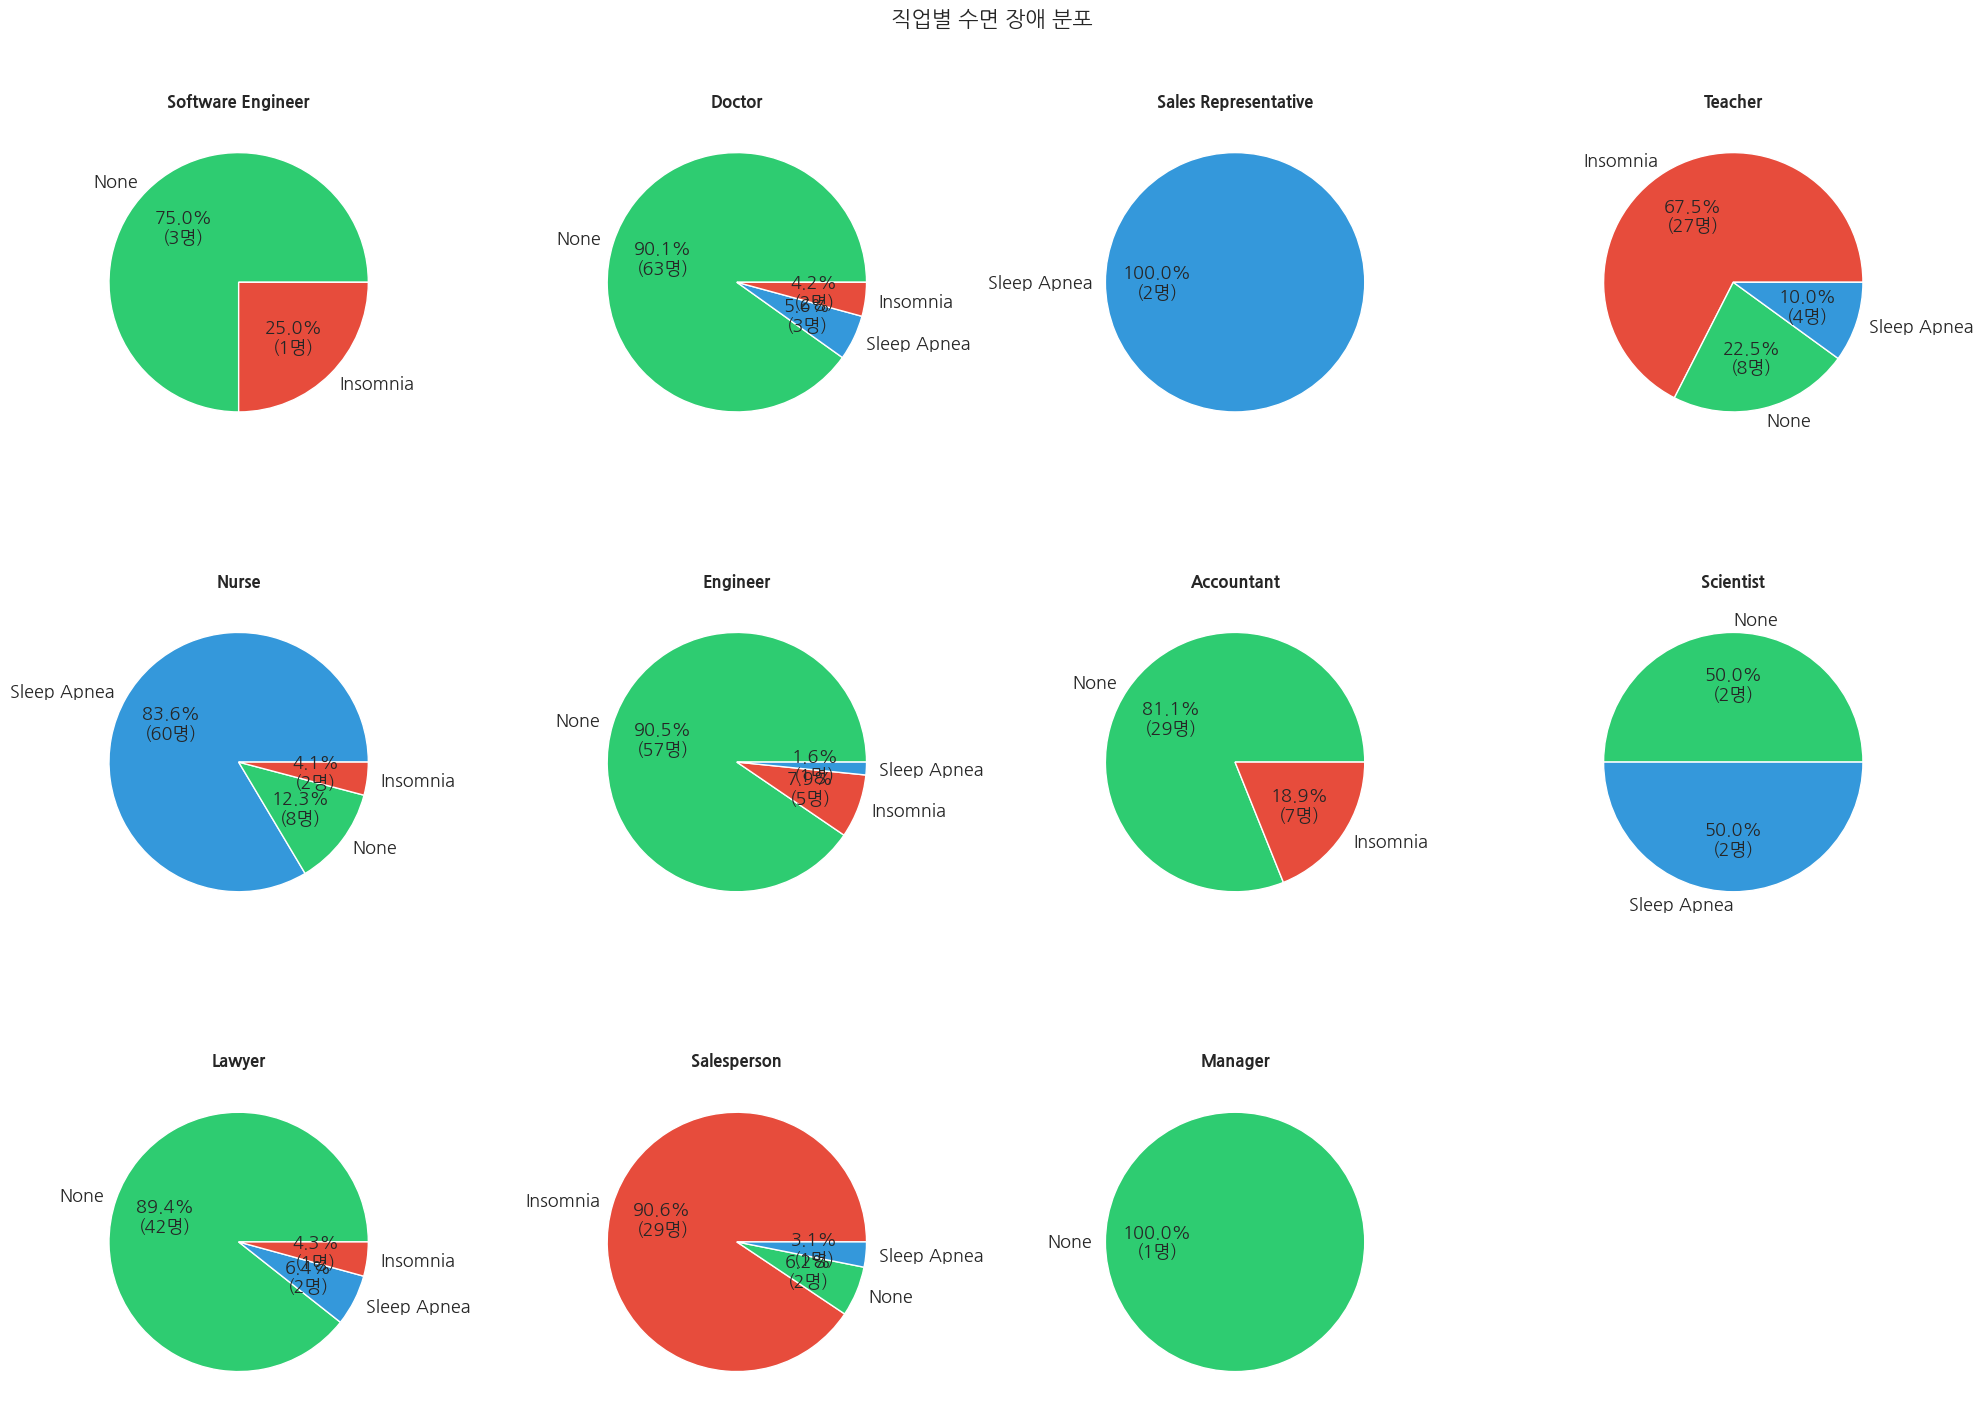

In [34]:
# 1-4 직업별 수면 장애
# 1-4 직업별 수면 장애
fig, axes = plt.subplots(3, 4, figsize=(20, 15))
axes = axes.ravel()

# 일관된 색상 매핑 설정
colors = {'None': '#2ecc71',  # 초록색
          'Insomnia': '#e74c3c',  # 빨간색
          'Sleep Apnea': '#3498db'}  # 파란색

# 각 직업별로 수면 장애 분포를 파이 차트로 시각화
for idx, occupation in enumerate(sleep['Occupation'].unique()):
    data = sleep[sleep['Occupation'] == occupation]['Sleep Disorder'].value_counts()
    # 색상 리스트 생성 (데이터 순서에 맞춰)
    color_list = [colors[disorder] for disorder in data.index]
    axes[idx].pie(data,labels=data.index,colors=color_list,autopct=lambda pct: f'{pct:.1f}%\n({int(pct/100.*sum(data))}명)')
    axes[idx].set_title(f'{occupation}', pad=10, fontsize=12, fontweight='bold')
    
plt.suptitle('직업별 수면 장애 분포');fig.delaxes(axes[11]);plt.tight_layout();plt.show()
# 요약
# 1. 엔지니어와 변호사가 수면장애가 가장 없는 것으로 나타났습니다.
# 2. 간호사나 세일즈맨을 보면 수면장애 분포가 데이터를 신뢰할수 없을 정도로 극단적으로 나왔습니다

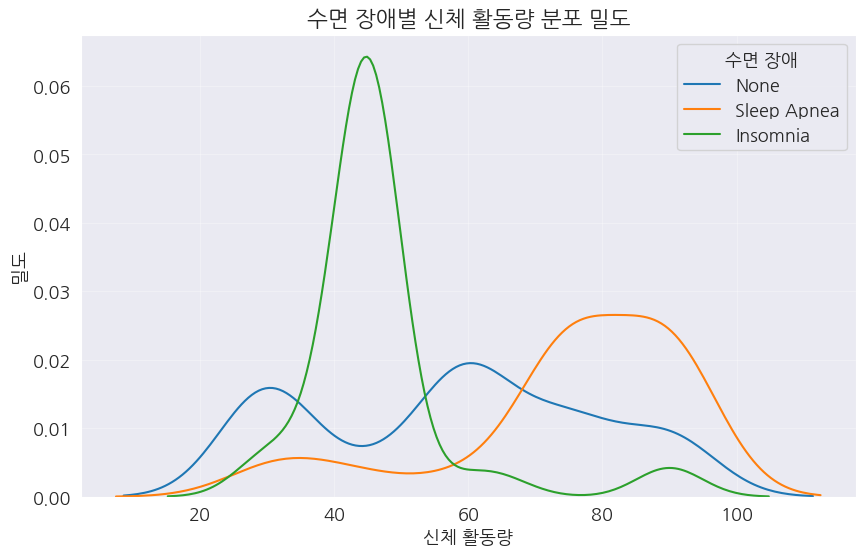


수면 장애별 신체 활동량 통계:
                count   mean    std   min   25%   50%   75%   max
Sleep Disorder                                                   
Insomnia         77.0  46.82  11.75  30.0  45.0  45.0  45.0  90.0
None            219.0  57.95  20.93  30.0  30.0  60.0  75.0  90.0
Sleep Apnea      78.0  74.79  17.93  30.0  75.0  75.0  90.0  90.0


In [31]:
#1-5. 신체활동량과 수면 장애

plt.figure(figsize=(10, 6))
for disorder in sleep['Sleep Disorder'].unique():
    sns.kdeplot(data=sleep[sleep['Sleep Disorder'] == disorder], 
                x='Physical Activity Level', 
                label=disorder)
plt.title('수면 장애별 신체 활동량 분포 밀도');plt.xlabel('신체 활동량');plt.ylabel('밀도');plt.legend(title='수면 장애');plt.grid(True, alpha=0.3);plt.show()
# 3. 수치적 요약
print("\n수면 장애별 신체 활동량 통계:")
print(sleep.groupby('Sleep Disorder')['Physical Activity Level'].describe().round(2))

#요약
#1.신체활동량이 많을수록 수면 무호흡증을 가진 사람들의 분포가 높게 나타났습니다.
#2.불면증을 갖은 사람들의 신체활동량이 가장 낮게 나타났습니다.
#3.결론 : 신체활동이 과도하게 많으면 수면 무호흡증에 신체활동이 과도하게 적으면 불면증에 걸릴 확률이 높아진다고 볼 수 있습니다.

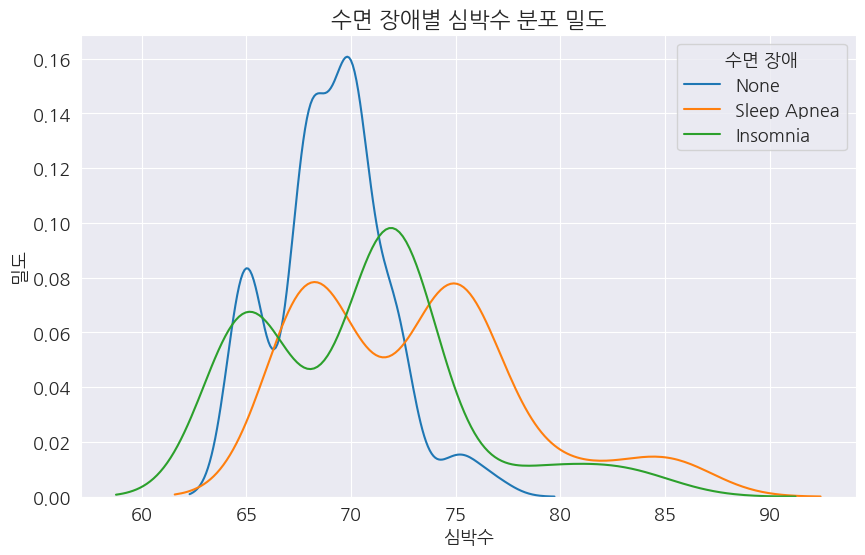


수면 장애별 심박수 통계:
                count   mean   std   min   25%   50%   75%   max
Sleep Disorder                                                  
Insomnia         77.0  70.47  4.95  65.0  65.0  72.0  72.0  85.0
None            219.0  69.02  2.66  65.0  68.0  70.0  70.0  77.0
Sleep Apnea      78.0  73.09  5.12  68.0  68.0  75.0  75.0  86.0


In [32]:
#1-6. 심박수와 수면 장애
plt.figure(figsize=(10, 6))
for disorder in sleep['Sleep Disorder'].unique():
    sns.kdeplot(data=sleep[sleep['Sleep Disorder'] == disorder], 
                x='Heart Rate', 
                label=disorder)
    
plt.title('수면 장애별 심박수 분포 밀도');plt.xlabel('심박수');plt.ylabel('밀도');plt.legend(title='수면 장애');plt.show()

# 3. 수치적 요약
print("\n수면 장애별 심박수 통계:")
print(sleep.groupby('Sleep Disorder')['Heart Rate'].describe().round(2))
#요약
# 1. 수면 장애가 없는 사람들의 심박수 평균이 가장 낮고, 분포가 가장 낮게 나타났습니다.
# 2. 수면 무호흡증을 갖고 있는 사람들의 심박수 평균이 가장 높게 나타났습니다.

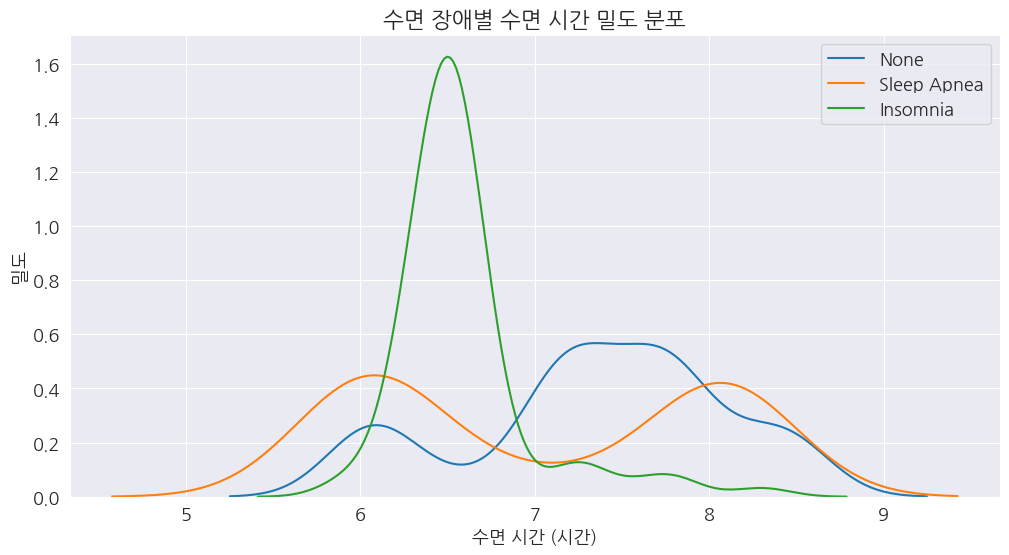

                count  mean   std  min  25%  50%  75%  max
Sleep Disorder                                            
Insomnia         77.0  6.59  0.39  5.9  6.4  6.5  6.6  8.3
None            219.0  7.36  0.73  6.0  7.1  7.4  7.8  8.5
Sleep Apnea      78.0  7.03  0.97  5.8  6.1  6.8  8.1  8.2


In [33]:
#1-7. 수면 시간과 수면 장애
plt.figure(figsize=(12, 6))
for disorder in sleep['Sleep Disorder'].unique():
    sns.kdeplot(data=sleep[sleep['Sleep Disorder'] == disorder], x='Sleep Duration', label=disorder)
plt.title('수면 장애별 수면 시간 밀도 분포');plt.xlabel('수면 시간 (시간)');plt.ylabel('밀도');plt.legend();plt.show()
print(sleep.groupby('Sleep Disorder')['Sleep Duration'].describe().round(2))

# 요약
# 1. 수면 장애가 없는 사람들의 수면 시간이 평균적으로 더 크게 나타났습니다.
# 2, 불면증을 갖고 있는 사람의들의 수면 시간이 가장 짧고,시간 분포가 가장 좁게 나타나고 있습니다.

---

# 4.결론

## 4-1.수면 만족도
### 요약
- 분석 결과, **나이**, **스트레스 수준**, **직업**, **수면 장애 여부**, **수면 시간**, **심박수**가 수면의 질에 유의미한 영향을 미치는 것으로 나타났습니다. 특히, 높은 스트레스는 낮은 수면의 질과 밀접한 관련이 있었습니다.

#### 주요 내용
- **나이**: 나이가 많아질수록 수면의 질이 향상되는 경향이 나타남.
- **성별**: 여성은 남성보다 전반적으로 수면 만족도가 높은 경향이 있음.
- **직업**: 엔지니어 직군이 가장 높은 수면 만족도를 보임.
- **수면 장애 여부**: 수면 장애가 없는 그룹이 전반적으로 가장 높은 만족도를 나타냄.
- **수면 시간**: 수면 시간이 길수록 수면 만족도가 높아지는 **양의 상관관계**가 있음.
- **스트레스**: 스트레스 수준이 높을수록 수면 품질이 저하됨.
- **심박수**: 심박수가 낮을수록 수면 품질이 향상되는 경향이 있음.

## 4-2 수면 장애
### 요약
- 수면 장애는 **나이**, **성별**, **BMI**, **직업**, **신체활동량**, **심박수**, **수면 시간**과 유의미한 상관관계가 있는 것으로 나타났습니다.

#### 주요 내용
- **수면 만족도**: 같은 나이를 기준으로 수면 장애가 없는 그룹이 더 높은 수면 만족도를 보임.
- **나이와 수면 장애**: 나이가 많아질수록 **수면 무호흡증**을 가진 사람들의 분포가 증가.
- **직업**:
  - **수면 장애가 적은 직업**: 엔지니어, 변호사.
  - **수면 장애가 많은 직업**: 간호사, 영업 사원(수면 장애 비율 약 90%),교사.
- **신체활동**:
  - **과도한 신체활동**: 수면 무호흡증 증가.
  - **신체활동 부족**: 불면증 비율 증가.
- **심박수**: 수면 장애가 없는 사람들의 **평균 심박수가 가장 낮고**, 분포도 가장 낮음.
- **수면 시간**: 수면 장애가 없는 사람들의 **수면 시간이 평균적으로 더 긴** 것으로 나타남.

## 4-3.수면의 실질적 개선 방안
1. 스트레스 관리:스트레스가 수면의 질에 큰 영향을 미치는 것으로 확인된 만큼, 정기적인 스트레스 관리 필요.   
2. 직업별 수면 관리:자신의 직업이 간호사, 영업 사원, 교사와 같이 수면 장애 비율이 높은 직군이라면, 자신의 자신의 수면 건강에 더욱 주의를 기울여야 합니다.
3. 적정 신체활동 관리:신체활동이 너무 적거나 많으면 수면 장애에 취약해질 수 있으므로 '균형 잡힌 신체활동'이 중요합니다
4. 심박수 관리:안정시 심박수가 낮을수록 수면의 질이 높고 수면 장애로부터 자유로워질 수 있으므로 심박수 관리가 중요
5. 나이별 수면 관리:나이가 많아질수록 수면 무호흡증을 가진 사람들의 분포가 증가하므로 나이가 많아질수록 자신의 수면 건강에 더욱 주의를 기울여야 합니다.
---

# 5. 한계점 및 개선방향

## 한계점
- **수면 만족도의 주관성**:  
  분석의 핵심 변수인 수면 만족도는 개인의 주관적인 응답에 기반하고 있어, 객관성이 부족하다는 한계가 존재합니다.
- **데이터 신뢰성 문제**:  
  혈압 데이터와 같이 상식적으로 이해할 수 없는 결과가 나타나 데이터의 신뢰성이 의심됩니다.
- **데이터 품질**:  
  분석 결과 데이터 수집에서 성별과 나이의 심각한 분포 차이, 실제 사회의 다양한 직업군을 대표하지 못하는 점 등 데이터 품질에 아쉬움이 있었습니다.

---

## 개선방향
- **객관적 지표 추가**:  
  웨어러블 장치의 데이터, 수면 시 뇌파 활동 등 객관적인 지표를 추가적으로 수집합니다.
- **데이터 신뢰성 향상**:  
  신뢰성 있는 데이터를 직접 수집하며, 수집 단계에서 간단한 통계 분석을 통해 데이터의 품질을 검증합니다.
- **표본 다양성 확보**:  
  데이터 수집 과정에서 잠재적인 편향과 오류를 줄이기 위해 표본의 다양성을 확보하여 대표성을 높입니다.